# Credit Risk ML Pipeline - Comprehensive End-to-End Analysis

## Project Overview
This notebook implements a comprehensive machine learning pipeline for predicting loan defaults using multiple models and preprocessing strategies.

### ✅ UPDATED VERSION - 6 COMBINATIONS PER MODEL
- **Error-free execution** with proper function ordering
- **Enhanced configuration** with validation and fallbacks
- **Comprehensive feature engineering** with 3 approaches (Raw, Log Transform, Binning+Encoding)
- **54 model variants** tested systematically (9 models × 6 combinations each)
- **6 combinations per model**: 3 feature approaches × 2 PCA options
- **Complete evaluation** with visualizations and business insights
- **Production-ready** recommendations and deployment roadmap

### Pipeline Components:
1. **Configuration & Setup** - Centralized configuration with validation
2. **Data Loading & Exploration** - Load credit risk dataset with testing options
3. **Feature Engineering** - Raw Features, Log Transform, Binning+Encoding
4. **Data Preprocessing** - Handle missing values, encoding, and splitting
5. **Model Training** - 9 ML models with hyperparameter tuning
6. **Model Evaluation** - Performance comparison and visualization
7. **Results & Recommendations** - Best model selection and business insights

### Models Implemented:
- **Baseline:** Logistic Regression
- **Tree-based:** Decision Tree, Random Forest, Gradient Boosting
- **Boosting:** XGBoost, LightGBM, CatBoost
- **Other:** SVM, KNN

### Feature Engineering Approaches:
- **Raw Features:** One-hot encoding + ordinal encoding (no numerical transformation)
- **Log Transform:** Log1p transformation + one-hot encoding (mutually exclusive with binning)
- **Binning+Encoding:** Numerical binning + target encoding (mutually exclusive with log transform)

### Technical Specifications:
- 6 combinations per model (3 feature approaches × 2 PCA options)
- GridSearchCV with cross-validation for hyperparameter tuning
- Comprehensive overfitting analysis across all variants
- ROC curves and performance metrics for all 54 combinations
- Business recommendations and deployment roadmap


## 1. Configuration & Setup

All configuration options are centralized here for easy modification. **This cell must be run first!**


## 🆕 COMPREHENSIVE 6-COMBINATION MODEL TESTING

**UPDATED FEATURE**: This notebook now systematically tests **6 combinations for each model** to provide comprehensive coverage of the feature engineering space.

### Configuration Structure:

**3 Feature Engineering Approaches:**
1. **Raw Features** - One-hot encoding + ordinal encoding
2. **Log Transform** - Log transformation of numerical features (mutually exclusive with binning)
3. **Binning+Encoding** - Numerical binning + target encoding (mutually exclusive with log transform)

**2 PCA Options:**
1. **With PCA** - Apply PCA for dimensionality reduction
2. **Without PCA** - Keep original feature space

### Result:
- **3 feature approaches × 2 PCA options = 6 combinations per model**
- **9 models × 6 combinations = 54 total model variants**
- **Systematic testing** across all feature engineering approaches
- **Optimal configuration identification** for each model type

### Benefits:
- **Comprehensive comparison** of feature engineering effectiveness
- **PCA impact analysis** for each feature approach
- **Model-specific optimization** recommendations
- **Production-ready** best model selection


In [14]:
# ============================================================================
# CONFIGURATION SECTION - UPDATED FOR 6 COMBINATIONS PER MODEL
# ============================================================================

# Testing configuration
TEST_MODE = False  # Set to True for quick testing, False for full pipeline
TEST_SIZE = 200   # Number of rows to use in test mode (increase for full run)
STRATIFIED_SAMPLE = True  # True for balanced sampling, False for first n rows

# ============================================================================
# 🆕 COMPREHENSIVE FEATURE ENGINEERING - 6 COMBINATIONS PER MODEL
# ============================================================================

# Feature Engineering Pipeline Configuration - ALL 3 APPROACHES ENABLED
USE_RAW_FEATURES = True           # Raw features with one-hot + ordinal encoding
USE_LOG_TRANSFORM = True          # Log transformation of numerical features
USE_BINNING_ENCODING = True       # Binning + target encoding approach

# Feature engineering detailed configuration
FEATURE_CONFIG = {
    'binned_encoding_method': 'target',  # 'target' or 'ordinal' for binned features
    'pca_components': 0.95,              # PCA components (float for variance ratio)
}

# PCA Pipeline Configuration - BOTH OPTIONS ENABLED FOR 6 COMBINATIONS
PCA_OPTIONS = {
    'with_pca': True,      # Test models with PCA
    'without_pca': True,   # Test models without PCA
}

# Model Configuration
MODEL_CONFIG = {
    'baseline_model': 'Logistic Regression',  # Baseline model for comparison
    'include_all_models': True,               # Include all 9 models
    'scoring_metric': 'roc_auc',             # GridSearchCV scoring metric
}

# Hyperparameter Grid Configuration
GRID_CONFIG = {
    'test_mode_reduced_grid': True,  # Use reduced grids in test mode for faster execution
    'cv_folds': 3,                   # Cross-validation folds
}

# ============================================================================
# CONFIGURATION VALIDATION & FALLBACKS
# ============================================================================

# VALIDATION: Ensure at least one feature approach is enabled
if not any([USE_RAW_FEATURES, USE_LOG_TRANSFORM, USE_BINNING_ENCODING]):
    print("⚠️ WARNING: No feature approaches enabled. Enabling raw features as fallback.")
    USE_RAW_FEATURES = True

# VALIDATION: Ensure at least one PCA option is enabled
if not any(PCA_OPTIONS.values()):
    print("⚠️ WARNING: No PCA options enabled. Enabling without_pca as fallback.")
    PCA_OPTIONS['without_pca'] = True

# ============================================================================
# CONFIGURATION DISPLAY
# ============================================================================

print("⚙️ COMPREHENSIVE PIPELINE CONFIGURATION - 6 COMBINATIONS PER MODEL")
print("=" * 80)
print(f"🔧 Testing: {'TEST MODE' if TEST_MODE else 'PRODUCTION MODE'}")
if TEST_MODE:
    print(f"   Sample Size: {TEST_SIZE} rows")
    print(f"   Reduced Grids: {'ON' if GRID_CONFIG['test_mode_reduced_grid'] else 'OFF'}")
    print(f"   CV Folds: {GRID_CONFIG['cv_folds']}")

print(f"\n📊 Feature Engineering Approaches - ALL 3 ENABLED:")
print(f"   1. Raw Features: {'✓' if USE_RAW_FEATURES else '✗'}")
print(f"   2. Log Transform: {'✓' if USE_LOG_TRANSFORM else '✗'}")
print(f"   3. Binning+Encoding: {'✓' if USE_BINNING_ENCODING else '✗'}")

print(f"\n🔍 PCA Options - BOTH ENABLED:")
print(f"   With PCA: {'✓' if PCA_OPTIONS['with_pca'] else '✗'}")
print(f"   Without PCA: {'✓' if PCA_OPTIONS['without_pca'] else '✗'}")

print(f"\n🤖 Model Configuration:")
print(f"   Baseline Model: {MODEL_CONFIG['baseline_model']}")
print(f"   All Models: {'✓' if MODEL_CONFIG['include_all_models'] else '✗'}")
print(f"   Scoring Metric: {MODEL_CONFIG['scoring_metric']}")

# Calculate total model variations - 6 combinations per model
feature_count = sum([USE_RAW_FEATURES, USE_LOG_TRANSFORM, USE_BINNING_ENCODING])
pca_count = sum(PCA_OPTIONS.values())
model_count = 9 if MODEL_CONFIG['include_all_models'] else 1
total_variations = feature_count * pca_count * model_count

print(f"\n📈 Pipeline Scope - 6 COMBINATIONS PER MODEL:")
print(f"   Feature Approaches: {feature_count}")
print(f"   PCA Variations: {pca_count}")
print(f"   Models: {model_count}")
print(f"   Total Model Variations: {total_variations}")

print(f"\n🎯 COMBINATION STRUCTURE FOR EACH MODEL:")
combination_labels = []
for feature_approach in ['Raw Features', 'Log Transform', 'Binning+Encoding']:
    for pca_option in ['With PCA', 'Without PCA']:
        combination_labels.append(f"{feature_approach} + {pca_option}")

for i, combo in enumerate(combination_labels, 1):
    print(f"   {i}. {combo}")

print("=" * 80)


⚙️ COMPREHENSIVE PIPELINE CONFIGURATION - 6 COMBINATIONS PER MODEL
🔧 Testing: PRODUCTION MODE

📊 Feature Engineering Approaches - ALL 3 ENABLED:
   1. Raw Features: ✓
   2. Log Transform: ✓
   3. Binning+Encoding: ✓

🔍 PCA Options - BOTH ENABLED:
   With PCA: ✓
   Without PCA: ✓

🤖 Model Configuration:
   Baseline Model: Logistic Regression
   All Models: ✓
   Scoring Metric: roc_auc

📈 Pipeline Scope - 6 COMBINATIONS PER MODEL:
   Feature Approaches: 3
   PCA Variations: 2
   Models: 9
   Total Model Variations: 54

🎯 COMBINATION STRUCTURE FOR EACH MODEL:
   1. Raw Features + With PCA
   2. Raw Features + Without PCA
   3. Log Transform + With PCA
   4. Log Transform + Without PCA
   5. Binning+Encoding + With PCA
   6. Binning+Encoding + Without PCA


## 2. Imports & Dependencies

Import all required libraries and set up the environment with proper error handling.


In [15]:
# ============================================================================
# IMPORTS AND SETUP - ENHANCED WITH ERROR HANDLING
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (roc_auc_score, f1_score, precision_score, recall_score, 
                           accuracy_score, confusion_matrix, classification_report,
                           roc_curve, precision_recall_curve)
import warnings
warnings.filterwarnings('ignore')

# Install and import additional packages with error handling
try:
    import category_encoders
    from category_encoders import TargetEncoder
    from lightgbm import LGBMClassifier
    from catboost import CatBoostClassifier
    print("✅ All required packages imported successfully")
except ImportError as e:
    print(f"⚠️ Import warning: {e}")
    print("Installing missing packages...")
    import subprocess
    import sys
    packages = ['category_encoders', 'lightgbm', 'catboost']
    for package in packages:
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        except Exception as install_error:
            print(f"Failed to install {package}: {install_error}")
    
    # Re-import after installation
    try:
        import category_encoders
        from category_encoders import TargetEncoder
        from lightgbm import LGBMClassifier
        from catboost import CatBoostClassifier
        print("✅ Packages installed and imported successfully")
    except ImportError as final_error:
        print(f"❌ Final import error: {final_error}")
        print("Some advanced models may not be available")

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('default')
sns.set_palette("husl")

print("🚀 Setup completed successfully!")


✅ All required packages imported successfully
🚀 Setup completed successfully!


## 3. Data Loading & Exploration

Load the credit risk dataset with improved error handling and multiple path fallbacks.


In [16]:
# ============================================================================
# DATA LOADING SECTION - ENHANCED WITH MULTIPLE PATH FALLBACKS
# ============================================================================

def load_data(test_mode=True, test_size=1000, stratified_sample=True):
    """
    Load credit risk dataset with optional testing subset and improved error handling
    
    Args:
        test_mode: If True, use only a subset of data for faster testing
        test_size: Number of rows to use in test mode
        stratified_sample: If True, maintain class balance in sampling
    
    Returns:
        pandas.DataFrame: Loaded dataset
    """
    try:
        # Try different possible paths for the dataset
        possible_paths = [
            'credit-risk-dataset/credit_risk_dataset.csv',
            'Group_project/credit-risk-dataset/credit_risk_dataset.csv',
            'processed_credit_risk_dataset.csv',
            'Group_project/processed_credit_risk_dataset.csv',
            '../credit-risk-dataset/credit_risk_dataset.csv',
            'credit_risk_dataset.csv'
        ]
        
        df_full = None
        loaded_path = None
        
        for path in possible_paths:
            try:
                df_full = pd.read_csv(path)
                loaded_path = path
                print(f"✅ Dataset loaded from: {path}")
                break
            except FileNotFoundError:
                continue
            except Exception as e:
                print(f"⚠️ Error loading from {path}: {str(e)}")
                continue
        
        if df_full is None:
            raise FileNotFoundError("Dataset not found in any of the expected locations")
        
        print(f"📊 Full dataset shape: {df_full.shape}")
        
        # Validate dataset structure
        required_columns = ['loan_status']
        missing_columns = [col for col in required_columns if col not in df_full.columns]
        if missing_columns:
            raise ValueError(f"Missing required columns: {missing_columns}")
        
        if test_mode:
            if stratified_sample and test_size < len(df_full):
                # Use stratified sampling to maintain class balance
                try:
                    df_sample, _ = train_test_split(
                        df_full, 
                        test_size=1 - (test_size / len(df_full)),
                        stratify=df_full['loan_status'],
                        random_state=42
                    )
                    df = df_sample.copy()
                    print(f"✅ Loaded dataset (TEST MODE: {len(df)} rows, stratified sample)")
                except Exception as e:
                    print(f"⚠️ Stratified sampling failed: {str(e)}")
                    df = df_full.head(test_size).copy()
                    print(f"✅ Loaded dataset (TEST MODE: {len(df)} rows, first n rows)")
            else:
                df = df_full.head(test_size).copy()
                print(f"✅ Loaded dataset (TEST MODE: {len(df)} rows)")
        else:
            df = df_full.copy()
            print(f"✅ Loaded dataset (FULL DATASET: {len(df)} rows)")
        
        return df
        
    except Exception as e:
        print(f"❌ Error loading data: {str(e)}")
        print("Please ensure the credit risk dataset is available in one of these locations:")
        for path in possible_paths:
            print(f"  - {path}")
        return None

# Load the data with current configuration
print("🔍 Loading credit risk dataset...")
df = load_data(
    test_mode=TEST_MODE, 
    test_size=TEST_SIZE,
    stratified_sample=STRATIFIED_SAMPLE
)

if df is not None:
    print(f"\n📊 DATASET INFORMATION:")
    print(f"Shape: {df.shape}")
    print(f"Target distribution: {df['loan_status'].value_counts().to_dict()}")
    
    # Display basic info
    print(f"\n📋 Sample data:")
    display(df.head())
    
    print(f"\n🔍 Data types:")
    display(df.dtypes.to_frame('Data Type'))
    
    print(f"\n📊 Missing values:")
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        display(missing_values[missing_values > 0])
    else:
        print("No missing values found")
        
    print(f"\n📈 Numerical features summary:")
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    if len(numerical_cols) > 0:
        display(df[numerical_cols].describe())
    
    print(f"\n🏷️ Categorical features summary:")
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        print(f"{col}: {df[col].nunique()} unique values")
        if df[col].nunique() <= 10:
            print(f"  Values: {list(df[col].unique())}")
else:
    raise ValueError("Failed to load data. Please check file paths and try again.")


🔍 Loading credit risk dataset...
✅ Dataset loaded from: credit-risk-dataset/credit_risk_dataset.csv
📊 Full dataset shape: (32581, 12)
✅ Loaded dataset (FULL DATASET: 32581 rows)

📊 DATASET INFORMATION:
Shape: (32581, 12)
Target distribution: {0: 25473, 1: 7108}

📋 Sample data:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4



🔍 Data types:


,Data Type
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64



📊 Missing values:


person_emp_length     895
loan_int_rate        3116
dtype: int64


📈 Numerical features summary:


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000



🏷️ Categorical features summary:
person_home_ownership: 4 unique values
  Values: ['RENT', 'OWN', 'MORTGAGE', 'OTHER']
loan_intent: 6 unique values
  Values: ['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION']
loan_grade: 7 unique values
  Values: ['D', 'B', 'C', 'A', 'E', 'F', 'G']
cb_person_default_on_file: 2 unique values
  Values: ['Y', 'N']


## 4. Feature Engineering Functions

Define all feature engineering functions before using them. This includes raw features, log transform, and binning approaches.


In [17]:
# ============================================================================
# FEATURE ENGINEERING FUNCTIONS - COMPREHENSIVE IMPLEMENTATION
# ============================================================================

# Define binning configurations for numerical features
NUMERICAL_BINNING_CONFIG = {
    'person_age': {
        'bins': [0, 25, 35, 50, 65, 100],
        'labels': ['Young', 'Adult', 'Middle', 'Senior', 'Elder']
    },
    'person_income': {
        'bins': [0, 30000, 50000, 80000, 120000, float('inf')],
        'labels': ['Low', 'Medium', 'High', 'Very_High', 'Ultra_High']
    },
    'person_emp_length': {
        'bins': [0, 1, 5, 10, 20, float('inf')],
        'labels': ['New', 'Short', 'Medium', 'Long', 'Very_Long']
    },
    'loan_amnt': {
        'bins': [0, 5000, 10000, 15000, 25000, float('inf')],
        'labels': ['Very_Small', 'Small', 'Medium', 'Large', 'Very_Large']
    },
    'loan_int_rate': {
        'bins': [0, 8, 12, 16, 20, float('inf')],
        'labels': ['Very_Low', 'Low', 'Medium', 'High', 'Very_High']
    },
    'loan_percent_income': {
        'bins': [0, 0.1, 0.2, 0.3, 0.5, float('inf')],
        'labels': ['Very_Low', 'Low', 'Medium', 'High', 'Very_High']
    },
    'cb_person_cred_hist_length': {
        'bins': [0, 5, 10, 20, float('inf')],
        'labels': ['Short', 'Medium', 'Long', 'Very_Long']
    }
}

def create_raw_features_dataset(df):
    """
    Create dataset with raw features using one-hot and ordinal encoding
    """
    print(f"📊 Creating RAW FEATURES dataset...")
    df_raw = df.copy()
    
    # One-hot encode categorical features (except loan_grade which has natural order)
    onehot_features = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']
    onehot_features = [f for f in onehot_features if f in df_raw.columns]
    
    if onehot_features:
        try:
            df_raw = pd.get_dummies(df_raw, columns=onehot_features, prefix=onehot_features, drop_first=False)
        except Exception as e:
            print(f"    ⚠️ Warning in one-hot encoding: {str(e)}")
    
    # Ordinal encode loan_grade (has natural order)
    if 'loan_grade' in df_raw.columns:
        try:
            grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
            grade_mapping = {grade: i for i, grade in enumerate(grade_order)}
            df_raw['loan_grade_ordinal'] = df_raw['loan_grade'].map(grade_mapping)
            # Fill missing values with median
            if df_raw['loan_grade_ordinal'].isnull().sum() > 0:
                df_raw['loan_grade_ordinal'].fillna(df_raw['loan_grade_ordinal'].median(), inplace=True)
            df_raw.drop(columns=['loan_grade'], inplace=True)
        except Exception as e:
            print(f"    ⚠️ Warning processing loan_grade: {str(e)}")
    
    print(f"  ✅ Raw features: {df_raw.shape[1]} total features")
    return df_raw

def create_log_transform_dataset(df):
    """
    Create dataset with log transformation for numerical features (NO binning)
    """
    print(f"📈 Creating LOG TRANSFORM dataset...")
    df_log = df.copy()
    
    # Apply log transformation to numerical features
    numerical_features = list(NUMERICAL_BINNING_CONFIG.keys())
    log_features_added = 0
    
    for feature in numerical_features:
        if feature in df_log.columns:
            try:
                log_col = f"{feature}_log"
                # Ensure positive values for log transformation
                df_log[log_col] = np.log1p(df_log[feature].clip(lower=0))
                log_features_added += 1
                # Keep original feature as well for comparison
            except Exception as e:
                print(f"    ⚠️ Warning processing {feature}: {str(e)}")
    
    # Encode categorical features with one-hot encoding
    onehot_features = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']
    onehot_features = [f for f in onehot_features if f in df_log.columns]
    
    if onehot_features:
        try:
            df_log = pd.get_dummies(df_log, columns=onehot_features, prefix=onehot_features, drop_first=False)
        except Exception as e:
            print(f"    ⚠️ Warning in one-hot encoding: {str(e)}")
    
    # Ordinal encode loan_grade (has natural order)
    if 'loan_grade' in df_log.columns:
        try:
            grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
            grade_mapping = {grade: i for i, grade in enumerate(grade_order)}
            df_log['loan_grade_ordinal'] = df_log['loan_grade'].map(grade_mapping)
            # Fill missing values with median
            if df_log['loan_grade_ordinal'].isnull().sum() > 0:
                df_log['loan_grade_ordinal'].fillna(df_log['loan_grade_ordinal'].median(), inplace=True)
            df_log.drop(columns=['loan_grade'], inplace=True)
        except Exception as e:
            print(f"    ⚠️ Warning processing loan_grade: {str(e)}")
    
    print(f"  ✅ Log features: {df_log.shape[1]} total features (+{log_features_added} log transformed)")
    return df_log

def create_binning_encoding_dataset(df):
    """
    Create dataset with binning + encoding for numerical features (NO log transform)
    """
    print(f"🗂️ Creating BINNING + ENCODING dataset...")
    df_bin = df.copy()
    
    encoding_method = FEATURE_CONFIG['binned_encoding_method']
    binned_features_added = 0
    
    # Apply binning transformation and encoding
    for feature, config in NUMERICAL_BINNING_CONFIG.items():
        if feature in df_bin.columns:
            try:
                # Create binned version
                binned_col = f"{feature}_binned"
                df_bin[binned_col] = pd.cut(
                    df_bin[feature], 
                    bins=config['bins'], 
                    labels=config['labels'],
                    include_lowest=True
                )
                
                # Handle missing values in binned column
                if df_bin[binned_col].isnull().sum() > 0:
                    df_bin[binned_col] = df_bin[binned_col].fillna(config['labels'][0])
                
                # Apply encoding
                if encoding_method == 'target':
                    try:
                        target_encoder = TargetEncoder(cols=[binned_col], smoothing=1.0)
                        df_bin[f"{binned_col}_encoded"] = target_encoder.fit_transform(
                            df_bin[binned_col], df_bin['loan_status']
                        )
                    except Exception as te_error:
                        print(f"    ⚠️ Target encoding failed for {feature}, using ordinal: {str(te_error)}")
                        # Fallback to ordinal encoding
                        unique_labels = df_bin[binned_col].unique()
                        ordinal_mapping = {label: i for i, label in enumerate(unique_labels)}
                        df_bin[f"{binned_col}_encoded"] = df_bin[binned_col].map(ordinal_mapping)
                
                elif encoding_method == 'ordinal':
                    unique_labels = df_bin[binned_col].unique()
                    ordinal_mapping = {label: i for i, label in enumerate(unique_labels)}
                    df_bin[f"{binned_col}_encoded"] = df_bin[binned_col].map(ordinal_mapping)
                
                # Remove temporary binned column (keep only encoded version)
                df_bin.drop(columns=[binned_col], inplace=True)
                binned_features_added += 1
                
            except Exception as e:
                print(f"    ⚠️ Warning processing {feature}: {str(e)}")
    
    # Use target encoding for categorical features in binning approach
    categorical_features = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']
    categorical_features = [f for f in categorical_features if f in df_bin.columns]
    
    for cat_feature in categorical_features:
        try:
            target_encoder = TargetEncoder(cols=[cat_feature], smoothing=1.0)
            df_bin[f"{cat_feature}_target"] = target_encoder.fit_transform(
                df_bin[cat_feature], df_bin['loan_status']
            )
            df_bin.drop(columns=[cat_feature], inplace=True)
        except Exception as e:
            print(f"    ⚠️ Warning target encoding {cat_feature}: {str(e)}")
            # Fallback to ordinal encoding
            unique_values = df_bin[cat_feature].unique()
            ordinal_mapping = {val: i for i, val in enumerate(unique_values)}
            df_bin[f"{cat_feature}_ordinal"] = df_bin[cat_feature].map(ordinal_mapping)
            df_bin.drop(columns=[cat_feature], inplace=True)
    
    # Ordinal encode loan_grade
    if 'loan_grade' in df_bin.columns:
        try:
            grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
            grade_mapping = {grade: i for i, grade in enumerate(grade_order)}
            df_bin['loan_grade_ordinal'] = df_bin['loan_grade'].map(grade_mapping)
            # Fill missing values with median
            if df_bin['loan_grade_ordinal'].isnull().sum() > 0:
                df_bin['loan_grade_ordinal'].fillna(df_bin['loan_grade_ordinal'].median(), inplace=True)
            df_bin.drop(columns=['loan_grade'], inplace=True)
        except Exception as e:
            print(f"    ⚠️ Warning processing loan_grade: {str(e)}")
    
    print(f"  ✅ Binning features: {df_bin.shape[1]} total features (+{binned_features_added} binned & encoded)")
    return df_bin

# ============================================================================
# FEATURE ENGINEERING EXECUTION - UPDATED FOR 6 COMBINATIONS
# ============================================================================

print(f"🔧 COMPREHENSIVE FEATURE ENGINEERING PIPELINE - 6 COMBINATIONS")
print("=" * 80)

# Initialize datasets dictionary
datasets = {}

# Create all 3 feature engineering datasets
if USE_RAW_FEATURES:
    try:
        datasets['raw_features'] = create_raw_features_dataset(df)
    except Exception as e:
        print(f"❌ Error creating raw features: {str(e)}")

if USE_LOG_TRANSFORM:
    try:
        datasets['log_transform'] = create_log_transform_dataset(df)
    except Exception as e:
        print(f"❌ Error creating log transform features: {str(e)}")

if USE_BINNING_ENCODING:
    try:
        datasets['binning_encoding'] = create_binning_encoding_dataset(df)
    except Exception as e:
        print(f"❌ Error creating binning features: {str(e)}")

print(f"\n📊 FEATURE ENGINEERING SUMMARY:")
print(f"Original dataset: {df.shape}")
for name, dataset in datasets.items():
    print(f"{name.replace('_', ' ').title()}: {dataset.shape}")

print(f"\n✅ Created {len(datasets)} feature engineering variations")

# Validation check
if len(datasets) == 0:
    print("⚠️ WARNING: No feature engineering datasets created!")
    print("Creating fallback raw features dataset...")
    datasets['raw_features'] = create_raw_features_dataset(df)

print("=" * 80)


🔧 COMPREHENSIVE FEATURE ENGINEERING PIPELINE - 6 COMBINATIONS
📊 Creating RAW FEATURES dataset...
  ✅ Raw features: 21 total features
📈 Creating LOG TRANSFORM dataset...


  ✅ Log features: 28 total features (+7 log transformed)
🗂️ Creating BINNING + ENCODING dataset...
  ✅ Binning features: 19 total features (+7 binned & encoded)

📊 FEATURE ENGINEERING SUMMARY:
Original dataset: (32581, 12)
Raw Features: (32581, 21)
Log Transform: (32581, 28)
Binning Encoding: (32581, 19)

✅ Created 3 feature engineering variations


## 5. Data Preprocessing

Prepare the data for machine learning by handling missing values, scaling, and train/test splitting.


In [18]:
# ============================================================================
# COMPREHENSIVE DATA PREPROCESSING SECTION
# ============================================================================

def preprocess_single_dataset(df, dataset_name, test_size=0.3, random_state=42):
    """
    Preprocess a single dataset for machine learning with comprehensive error handling
    
    Args:
        df: Input DataFrame
        dataset_name: Name of the dataset for logging
        test_size: Proportion of data for testing
        random_state: Random seed for reproducibility
    
    Returns:
        dict: Contains X_train, X_test, y_train, y_test for the dataset
    """
    print(f"\n🔧 Preprocessing {dataset_name.replace('_', ' ').title()} dataset...")
    
    try:
        # Validate input
        if df is None or df.empty:
            raise ValueError(f"Dataset {dataset_name} is empty or None")
        
        # Separate features and target
        if 'loan_status' not in df.columns:
            raise ValueError(f"Target column 'loan_status' not found in {dataset_name}")
        
        X = df.drop('loan_status', axis=1)
        y = df['loan_status']
        
        print(f"  📊 Features shape: {X.shape}")
        print(f"  🎯 Target distribution: {y.value_counts().to_dict()}")
        
        # Validate features
        if X.shape[1] == 0:
            raise ValueError(f"No features found in {dataset_name}")
        
        # Handle missing values with improved logic
        missing_before = X.isnull().sum().sum()
        
        if missing_before > 0:
            print(f"  🔍 Found {missing_before} missing values - filling...")
            
            # Fill numerical columns with median
            numerical_cols = X.select_dtypes(include=[np.number]).columns
            for col in numerical_cols:
                if X[col].isnull().sum() > 0:
                    fill_value = X[col].median()
                    if pd.isna(fill_value):  # If median is also NaN
                        fill_value = 0
                    X[col].fillna(fill_value, inplace=True)
            
            # Fill categorical columns with mode or 'Unknown'
            categorical_cols = X.select_dtypes(include=['object']).columns
            for col in categorical_cols:
                if X[col].isnull().sum() > 0:
                    if len(X[col].mode()) > 0:
                        fill_value = X[col].mode()[0]
                    else:
                        fill_value = 'Unknown'
                    X[col].fillna(fill_value, inplace=True)
            
            # Check if there are still missing values
            remaining_missing = X.isnull().sum().sum()
            if remaining_missing > 0:
                print(f"    ⚠️ Warning: {remaining_missing} missing values remain")
        else:
            print(f"  ✅ No missing values found")
        
        # Validate target variable
        if y.isnull().sum() > 0:
            print(f"  ⚠️ Warning: Target has {y.isnull().sum()} missing values, dropping them")
            valid_indices = y.notnull()
            X = X[valid_indices]
            y = y[valid_indices]
        
        # Ensure target is binary
        unique_targets = y.unique()
        if len(unique_targets) != 2:
            print(f"  ⚠️ Warning: Target has {len(unique_targets)} unique values: {unique_targets}")
        
        # Split the data with validation
        try:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, 
                test_size=test_size, 
                random_state=random_state, 
                stratify=y
            )
        except ValueError as e:
            print(f"  ⚠️ Stratified split failed: {str(e)}, using random split")
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, 
                test_size=test_size, 
                random_state=random_state
            )
        
        print(f"  ✂️ Split: Train({X_train.shape[0]}) | Test({X_test.shape[0]})")
        
        # Final validation
        if X_train.shape[0] == 0 or X_test.shape[0] == 0:
            raise ValueError(f"Empty train or test set after split")
        
        return {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test,
            'feature_info': {
                'total_features': len(X_train.columns),
                'numerical_features': len(X_train.select_dtypes(include=[np.number]).columns),
                'categorical_features': len(X_train.select_dtypes(include=['object']).columns),
                'feature_names': list(X_train.columns)
            }
        }
        
    except Exception as e:
        print(f"  ❌ Error preprocessing {dataset_name}: {str(e)}")
        return None

# ============================================================================
# PREPROCESSING EXECUTION
# ============================================================================

print(f"🔧 COMPREHENSIVE DATA PREPROCESSING PIPELINE")
print("=" * 60)

preprocessed_datasets = {}

for dataset_name, dataset_df in datasets.items():
    result = preprocess_single_dataset(
        dataset_df, 
        dataset_name, 
        test_size=0.3, 
        random_state=42
    )
    
    if result is not None:
        preprocessed_datasets[dataset_name] = result

print(f"\n📊 PREPROCESSING SUMMARY:")
for name, data in preprocessed_datasets.items():
    feature_info = data['feature_info']
    print(f"{name.replace('_', ' ').title()}:")
    print(f"  Total features: {feature_info['total_features']}")
    print(f"  Numerical: {feature_info['numerical_features']} | Categorical: {feature_info['categorical_features']}")
    print(f"  Train samples: {len(data['y_train'])} | Test samples: {len(data['y_test'])}")

print(f"\n✅ Successfully preprocessed {len(preprocessed_datasets)} datasets")

# Validation check
if len(preprocessed_datasets) == 0:
    raise ValueError("No datasets were successfully preprocessed!")

print("=" * 60)

# Store preprocessing info for later use
preprocessing_info = {
    'total_datasets': len(preprocessed_datasets),
    'dataset_names': list(preprocessed_datasets.keys()),
    'feature_counts': {name: data['feature_info']['total_features'] 
                      for name, data in preprocessed_datasets.items()}
}


🔧 COMPREHENSIVE DATA PREPROCESSING PIPELINE

🔧 Preprocessing Raw Features dataset...
  📊 Features shape: (32581, 20)
  🎯 Target distribution: {0: 25473, 1: 7108}
  🔍 Found 4011 missing values - filling...
  ✂️ Split: Train(22806) | Test(9775)

🔧 Preprocessing Log Transform dataset...
  📊 Features shape: (32581, 27)
  🎯 Target distribution: {0: 25473, 1: 7108}
  🔍 Found 8022 missing values - filling...
  ✂️ Split: Train(22806) | Test(9775)

🔧 Preprocessing Binning Encoding dataset...
  📊 Features shape: (32581, 18)
  🎯 Target distribution: {0: 25473, 1: 7108}
  🔍 Found 4011 missing values - filling...
  ✂️ Split: Train(22806) | Test(9775)

📊 PREPROCESSING SUMMARY:
Raw Features:
  Total features: 20
  Numerical: 8 | Categorical: 0
  Train samples: 22806 | Test samples: 9775
Log Transform:
  Total features: 27
  Numerical: 15 | Categorical: 0
  Train samples: 22806 | Test samples: 9775
Binning Encoding:
  Total features: 18
  Numerical: 18 | Categorical: 0
  Train samples: 22806 | Test sa

## 6. Model Training

Train multiple machine learning models with hyperparameter tuning using GridSearchCV. All model functions are defined here before execution.


In [19]:
# ============================================================================
# COMPREHENSIVE MODEL TRAINING SECTION - ALL FUNCTIONS DEFINED FIRST
# ============================================================================

def create_preprocessor(X_train, use_pca=False):
    """
    Create preprocessing pipeline for numerical and categorical features with optional PCA
    """
    try:
        # Identify feature types
        numerical_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
        categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
        
        # Create transformers list
        transformers = []
        
        if numerical_features:
            transformers.append(('num', StandardScaler(), numerical_features))
        
        if categorical_features:
            transformers.append(
                ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
            )
        
        # Handle case where no transformers are needed
        if not transformers:
            print("    ⚠️ Warning: No numerical or categorical features found for preprocessing")
            return None
        
        # Create base preprocessor
        preprocessor = ColumnTransformer(transformers=transformers, remainder='passthrough')
        
        # Add PCA if requested
        if use_pca:
            pca_components = FEATURE_CONFIG['pca_components']
            pipeline_steps = [
                ('preprocessor', preprocessor),
                ('pca', PCA(n_components=pca_components, random_state=42))
            ]
            return Pipeline(pipeline_steps)
        else:
            return preprocessor
            
    except Exception as e:
        print(f"    ❌ Error creating preprocessor: {str(e)}")
        return None

def get_model_configurations(test_mode=False):
    """
    Define models and their hyperparameter grids with test/production mode support
    """
    
    if test_mode and GRID_CONFIG['test_mode_reduced_grid']:
        # Reduced grids for faster testing
        models_config = {
            'Logistic Regression': {
                'model': LogisticRegression(random_state=42, max_iter=1000),
                'params': {
                    'classifier__C': [0.1, 1],
                    'classifier__penalty': ['l2'],
                    'classifier__solver': ['liblinear']
                }
            },
            'Decision Tree': {
                'model': DecisionTreeClassifier(random_state=42),
                'params': {
                    'classifier__max_depth': [3, 5],
                    'classifier__min_samples_split': [2, 5]
                }
            },
            'Random Forest': {
                'model': RandomForestClassifier(random_state=42, n_jobs=-1),
                'params': {
                    'classifier__n_estimators': [50, 100],
                    'classifier__max_depth': [3, 5]
                }
            },
            'XGBoost': {
                'model': XGBClassifier(random_state=42, eval_metric='logloss'),
                'params': {
                    'classifier__n_estimators': [50, 100],
                    'classifier__max_depth': [3, 5],
                    'classifier__learning_rate': [0.1]
                }
            },
            'LGBM': {
                'model': LGBMClassifier(random_state=42, verbose=-1),
                'params': {
                    'classifier__n_estimators': [50, 100],
                    'classifier__max_depth': [3, 5],
                    'classifier__learning_rate': [0.1]
                }
            },
            'CatBoost': {
                'model': CatBoostClassifier(random_state=42, verbose=False),
                'params': {
                    'classifier__iterations': [50, 100],
                    'classifier__depth': [3, 5],
                    'classifier__learning_rate': [0.1]
                }
            },
            'Gradient Boosting': {
                'model': GradientBoostingClassifier(random_state=42),
                'params': {
                    'classifier__n_estimators': [50, 100],
                    'classifier__max_depth': [3, 5],
                    'classifier__learning_rate': [0.1]
                }
            },
            'SVM': {
                'model': SVC(random_state=42, probability=True),
                'params': {
                    'classifier__C': [0.1, 1],
                    'classifier__kernel': ['rbf']
                }
            },
            'KNN': {
                'model': KNeighborsClassifier(),
                'params': {
                    'classifier__n_neighbors': [3, 5],
                    'classifier__weights': ['uniform']
                }
            }
        }
    else:
        # Full grids for production
        models_config = {
            'Logistic Regression': {
                'model': LogisticRegression(random_state=42, max_iter=1000),
                'params': {
                    'classifier__C': [0.1, 1, 10],
                    'classifier__penalty': ['l1', 'l2'],
                    'classifier__solver': ['liblinear']
                }
            },
            'Decision Tree': {
                'model': DecisionTreeClassifier(random_state=42),
                'params': {
                    'classifier__max_depth': [3, 5, 7, None],
                    'classifier__min_samples_split': [2, 5, 10],
                    'classifier__min_samples_leaf': [1, 2, 4]
                }
            },
            'Random Forest': {
                'model': RandomForestClassifier(random_state=42, n_jobs=-1),
                'params': {
                    'classifier__n_estimators': [50, 100, 200],
                    'classifier__max_depth': [3, 5, 7, None],
                    'classifier__min_samples_split': [2, 5, 10]
                }
            },
            'XGBoost': {
                'model': XGBClassifier(random_state=42, eval_metric='logloss'),
                'params': {
                    'classifier__n_estimators': [50, 100, 200],
                    'classifier__max_depth': [3, 5, 7],
                    'classifier__learning_rate': [0.01, 0.1, 0.2],
                    'classifier__subsample': [0.8, 1.0]
                }
            },
            'LGBM': {
                'model': LGBMClassifier(random_state=42, verbose=-1),
                'params': {
                    'classifier__n_estimators': [50, 100, 200],
                    'classifier__max_depth': [3, 5, 7],
                    'classifier__learning_rate': [0.01, 0.1, 0.2],
                    'classifier__num_leaves': [20, 31, 50]
                }
            },
            'CatBoost': {
                'model': CatBoostClassifier(random_state=42, verbose=False),
                'params': {
                    'classifier__iterations': [50, 100, 200],
                    'classifier__depth': [3, 5, 7],
                    'classifier__learning_rate': [0.01, 0.1, 0.2]
                }
            },
            'Gradient Boosting': {
                'model': GradientBoostingClassifier(random_state=42),
                'params': {
                    'classifier__n_estimators': [50, 100, 200],
                    'classifier__max_depth': [3, 5, 7],
                    'classifier__learning_rate': [0.01, 0.1, 0.2]
                }
            },
            'SVM': {
                'model': SVC(random_state=42, probability=True),
                'params': {
                    'classifier__C': [0.1, 1, 10],
                    'classifier__kernel': ['rbf', 'linear'],
                    'classifier__gamma': ['scale', 'auto']
                }
            },
            'KNN': {
                'model': KNeighborsClassifier(),
                'params': {
                    'classifier__n_neighbors': [3, 5, 7, 11],
                    'classifier__weights': ['uniform', 'distance'],
                    'classifier__metric': ['euclidean', 'manhattan']
                }
            }
        }
    
    return models_config

def train_single_model_variant(X_train, y_train, model_name, model_config, preprocessor, variant_name):
    """
    Train a single model variant with GridSearchCV and comprehensive error handling
    """
    try:
        if preprocessor is None:
            raise ValueError("Preprocessor is None")
        
        # Create pipeline
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model_config['model'])
        ])
        
        # GridSearchCV with error handling
        cv = StratifiedKFold(n_splits=GRID_CONFIG['cv_folds'], shuffle=True, random_state=42)
        
        try:
            grid_search = GridSearchCV(
                pipeline,
                param_grid=model_config['params'],
                scoring=MODEL_CONFIG['scoring_metric'],
                cv=cv,
                n_jobs=-1,
                verbose=0
            )
            
            # Fit the model
            grid_search.fit(X_train, y_train)
            
            return {
                'model': grid_search.best_estimator_,
                'best_score': grid_search.best_score_,
                'best_params': grid_search.best_params_,
                'variant_name': variant_name
            }
            
        except Exception as cv_error:
            print(f"      ❌ GridSearchCV error for {variant_name}: {str(cv_error)}")
            return None
            
    except Exception as e:
        print(f"      ❌ Error training {variant_name}: {str(e)}")
        return None

def comprehensive_model_training():
    """
    Train all model combinations with 6 variants per model:
    3 feature approaches × 2 PCA options = 6 combinations
    """
    print(f"🚀 COMPREHENSIVE MODEL TRAINING - 6 COMBINATIONS PER MODEL")
    print("=" * 80)
    
    # Get model configurations
    models_config = get_model_configurations(test_mode=TEST_MODE)
    
    # Storage for all results
    all_results = {}
    all_models = {}
    
    # Determine which models to train
    if MODEL_CONFIG['include_all_models']:
        models_to_train = models_config
    else:
        baseline_model = MODEL_CONFIG['baseline_model']
        models_to_train = {baseline_model: models_config[baseline_model]}
    
    # Calculate total combinations: models × feature approaches × PCA options
    total_combinations = (
        len(models_to_train) * 
        len(preprocessed_datasets) * 
        len([k for k, v in PCA_OPTIONS.items() if v])
    )
    
    print(f"📊 Training {total_combinations} model combinations...")
    print(f"   Models: {len(models_to_train)}")
    print(f"   Feature approaches: {len(preprocessed_datasets)}")
    print(f"   PCA variations: {len([k for k, v in PCA_OPTIONS.items() if v])}")
    
    print(f"\n🎯 FEATURE APPROACHES:")
    for i, dataset_name in enumerate(preprocessed_datasets.keys(), 1):
        print(f"   {i}. {dataset_name.replace('_', ' ').title()}")
    
    print(f"\n🔍 PCA OPTIONS:")
    for i, (pca_option, enabled) in enumerate(PCA_OPTIONS.items(), 1):
        if enabled:
            print(f"   {i}. {pca_option.replace('_', ' ').title()}")
    
    combination_count = 0
    
    # Iterate through all combinations
    for dataset_name, dataset_data in preprocessed_datasets.items():
        print(f"\n📈 FEATURE APPROACH: {dataset_name.replace('_', ' ').title()}")
        print("-" * 60)
        
        X_train = dataset_data['X_train']
        y_train = dataset_data['y_train']
        
        for pca_option, pca_enabled in PCA_OPTIONS.items():
            if not pca_enabled:
                continue
                
            use_pca = (pca_option == 'with_pca')
            pca_suffix = "_PCA" if use_pca else "_NoPCA"
            
            print(f"\n  🔍 PCA Option: {pca_option.replace('_', ' ').title()}")
            
            # Create preprocessor for this combination
            preprocessor = create_preprocessor(X_train, use_pca=use_pca)
            
            if preprocessor is None:
                print(f"    ❌ Failed to create preprocessor for {dataset_name}")
                continue
            
            for model_name, model_config in models_to_train.items():
                combination_count += 1
                variant_name = f"{model_name}_{dataset_name}{pca_suffix}"
                
                print(f"    🤖 [{combination_count:2d}/{total_combinations}] {variant_name}")
                
                # Train the model variant
                result = train_single_model_variant(
                    X_train, y_train, model_name, model_config, 
                    preprocessor, variant_name
                )
                
                if result:
                    all_results[variant_name] = {
                        'model_name': model_name,
                        'feature_approach': dataset_name,
                        'pca_option': pca_option,
                        'best_score': result['best_score'],
                        'best_params': result['best_params']
                    }
                    all_models[variant_name] = result['model']
                    
                    print(f"      ✅ CV {MODEL_CONFIG['scoring_metric']}: {result['best_score']:.4f}")
    
    print(f"\n🎉 TRAINING COMPLETE!")
    print(f"Successfully trained: {len(all_models)} model variants")
    print(f"Failed: {total_combinations - len(all_models)}")
    
    # Print summary of combinations trained
    print(f"\n📊 COMBINATIONS TRAINED PER MODEL:")
    for model_name in models_to_train.keys():
        model_variants = [v for v in all_models.keys() if v.startswith(model_name)]
        print(f"   {model_name}: {len(model_variants)} variants")
        
        # List the 6 combinations for this model
        for variant in sorted(model_variants):
            parts = variant.split('_')
            feature_part = '_'.join(parts[2:-1]) if len(parts) > 3 else parts[2]
            pca_part = parts[-1]
            print(f"     → {feature_part.replace('_', ' ').title()} + {pca_part}")
    
    print("=" * 80)
    
    return all_models, all_results

# ============================================================================
# EXECUTE COMPREHENSIVE MODEL TRAINING
# ============================================================================

print("🚀 Starting comprehensive model training...")
best_models, training_results = comprehensive_model_training()

# Validation check
if len(best_models) == 0:
    raise ValueError("No models were successfully trained! Please check the configuration and data.")


🚀 Starting comprehensive model training...
🚀 COMPREHENSIVE MODEL TRAINING - 6 COMBINATIONS PER MODEL
📊 Training 54 model combinations...
   Models: 9
   Feature approaches: 3
   PCA variations: 2

🎯 FEATURE APPROACHES:
   1. Raw Features
   2. Log Transform
   3. Binning Encoding

🔍 PCA OPTIONS:
   1. With Pca
   2. Without Pca

📈 FEATURE APPROACH: Raw Features
------------------------------------------------------------

  🔍 PCA Option: With Pca
    🤖 [ 1/54] Logistic Regression_raw_features_PCA
      ✅ CV roc_auc: 0.8490
    🤖 [ 2/54] Decision Tree_raw_features_PCA
      ✅ CV roc_auc: 0.8429
    🤖 [ 3/54] Random Forest_raw_features_PCA
      ✅ CV roc_auc: 0.8993
    🤖 [ 4/54] XGBoost_raw_features_PCA
      ✅ CV roc_auc: 0.9048
    🤖 [ 5/54] LGBM_raw_features_PCA
      ✅ CV roc_auc: 0.9043
    🤖 [ 6/54] CatBoost_raw_features_PCA
      ✅ CV roc_auc: 0.9044
    🤖 [ 7/54] Gradient Boosting_raw_features_PCA
      ✅ CV roc_auc: 0.9032
    🤖 [ 8/54] SVM_raw_features_PCA
      ✅ CV roc_auc: 

## 7. Model Evaluation & Visualization

Evaluate all trained models on the test set and compare their performance with comprehensive metrics and visualizations.


🚀 Starting comprehensive evaluation of all model variants...
📊 COMPREHENSIVE MODEL EVALUATION
Evaluating 54 model variants...
✅ Logistic Regression_raw_features_PCA: Test ROC-AUC = 0.8588
✅ Decision Tree_raw_features_PCA: Test ROC-AUC = 0.8621
✅ Random Forest_raw_features_PCA: Test ROC-AUC = 0.9098
✅ XGBoost_raw_features_PCA: Test ROC-AUC = 0.9171
✅ LGBM_raw_features_PCA: Test ROC-AUC = 0.9167
✅ CatBoost_raw_features_PCA: Test ROC-AUC = 0.9159
✅ Gradient Boosting_raw_features_PCA: Test ROC-AUC = 0.9146
✅ SVM_raw_features_PCA: Test ROC-AUC = 0.8925
✅ KNN_raw_features_PCA: Test ROC-AUC = 0.8847
✅ Logistic Regression_raw_features_NoPCA: Test ROC-AUC = 0.8681
✅ Decision Tree_raw_features_NoPCA: Test ROC-AUC = 0.9144
✅ Random Forest_raw_features_NoPCA: Test ROC-AUC = 0.9361
✅ XGBoost_raw_features_NoPCA: Test ROC-AUC = 0.9520
✅ LGBM_raw_features_NoPCA: Test ROC-AUC = 0.9519
✅ CatBoost_raw_features_NoPCA: Test ROC-AUC = 0.9475
✅ Gradient Boosting_raw_features_NoPCA: Test ROC-AUC = 0.9517
✅ SV

,Variant,Model,Feature_Approach,PCA,Train_ROC_AUC,Test_ROC_AUC,Overfitting
51,Gradient Boosting_binning_encoding_NoPCA,Gradient Boosting,Binning Encoding,No,0.9817,0.9533,0.0283
12,XGBoost_raw_features_NoPCA,XGBoost,Raw Features,No,0.9861,0.9520,0.0341
30,XGBoost_log_transform_NoPCA,XGBoost,Log Transform,No,0.9861,0.9520,0.0341
13,LGBM_raw_features_NoPCA,LGBM,Raw Features,No,0.9796,0.9519,0.0277
31,LGBM_log_transform_NoPCA,LGBM,Log Transform,No,0.9796,0.9518,0.0278
15,Gradient Boosting_raw_features_NoPCA,Gradient Boosting,Raw Features,No,0.9806,0.9517,0.0290
33,Gradient Boosting_log_transform_NoPCA,Gradient Boosting,Log Transform,No,0.9806,0.9516,0.0290
48,XGBoost_binning_encoding_NoPCA,XGBoost,Binning Encoding,No,0.9888,0.9508,0.0380
49,LGBM_binning_encoding_NoPCA,LGBM,Binning Encoding,No,0.9783,0.9506,0.0277
50,CatBoost_binning_encoding_NoPCA,CatBoost,Binning Encoding,No,0.9692,0.9491,0.0201



📈 Creating comprehensive performance visualizations...


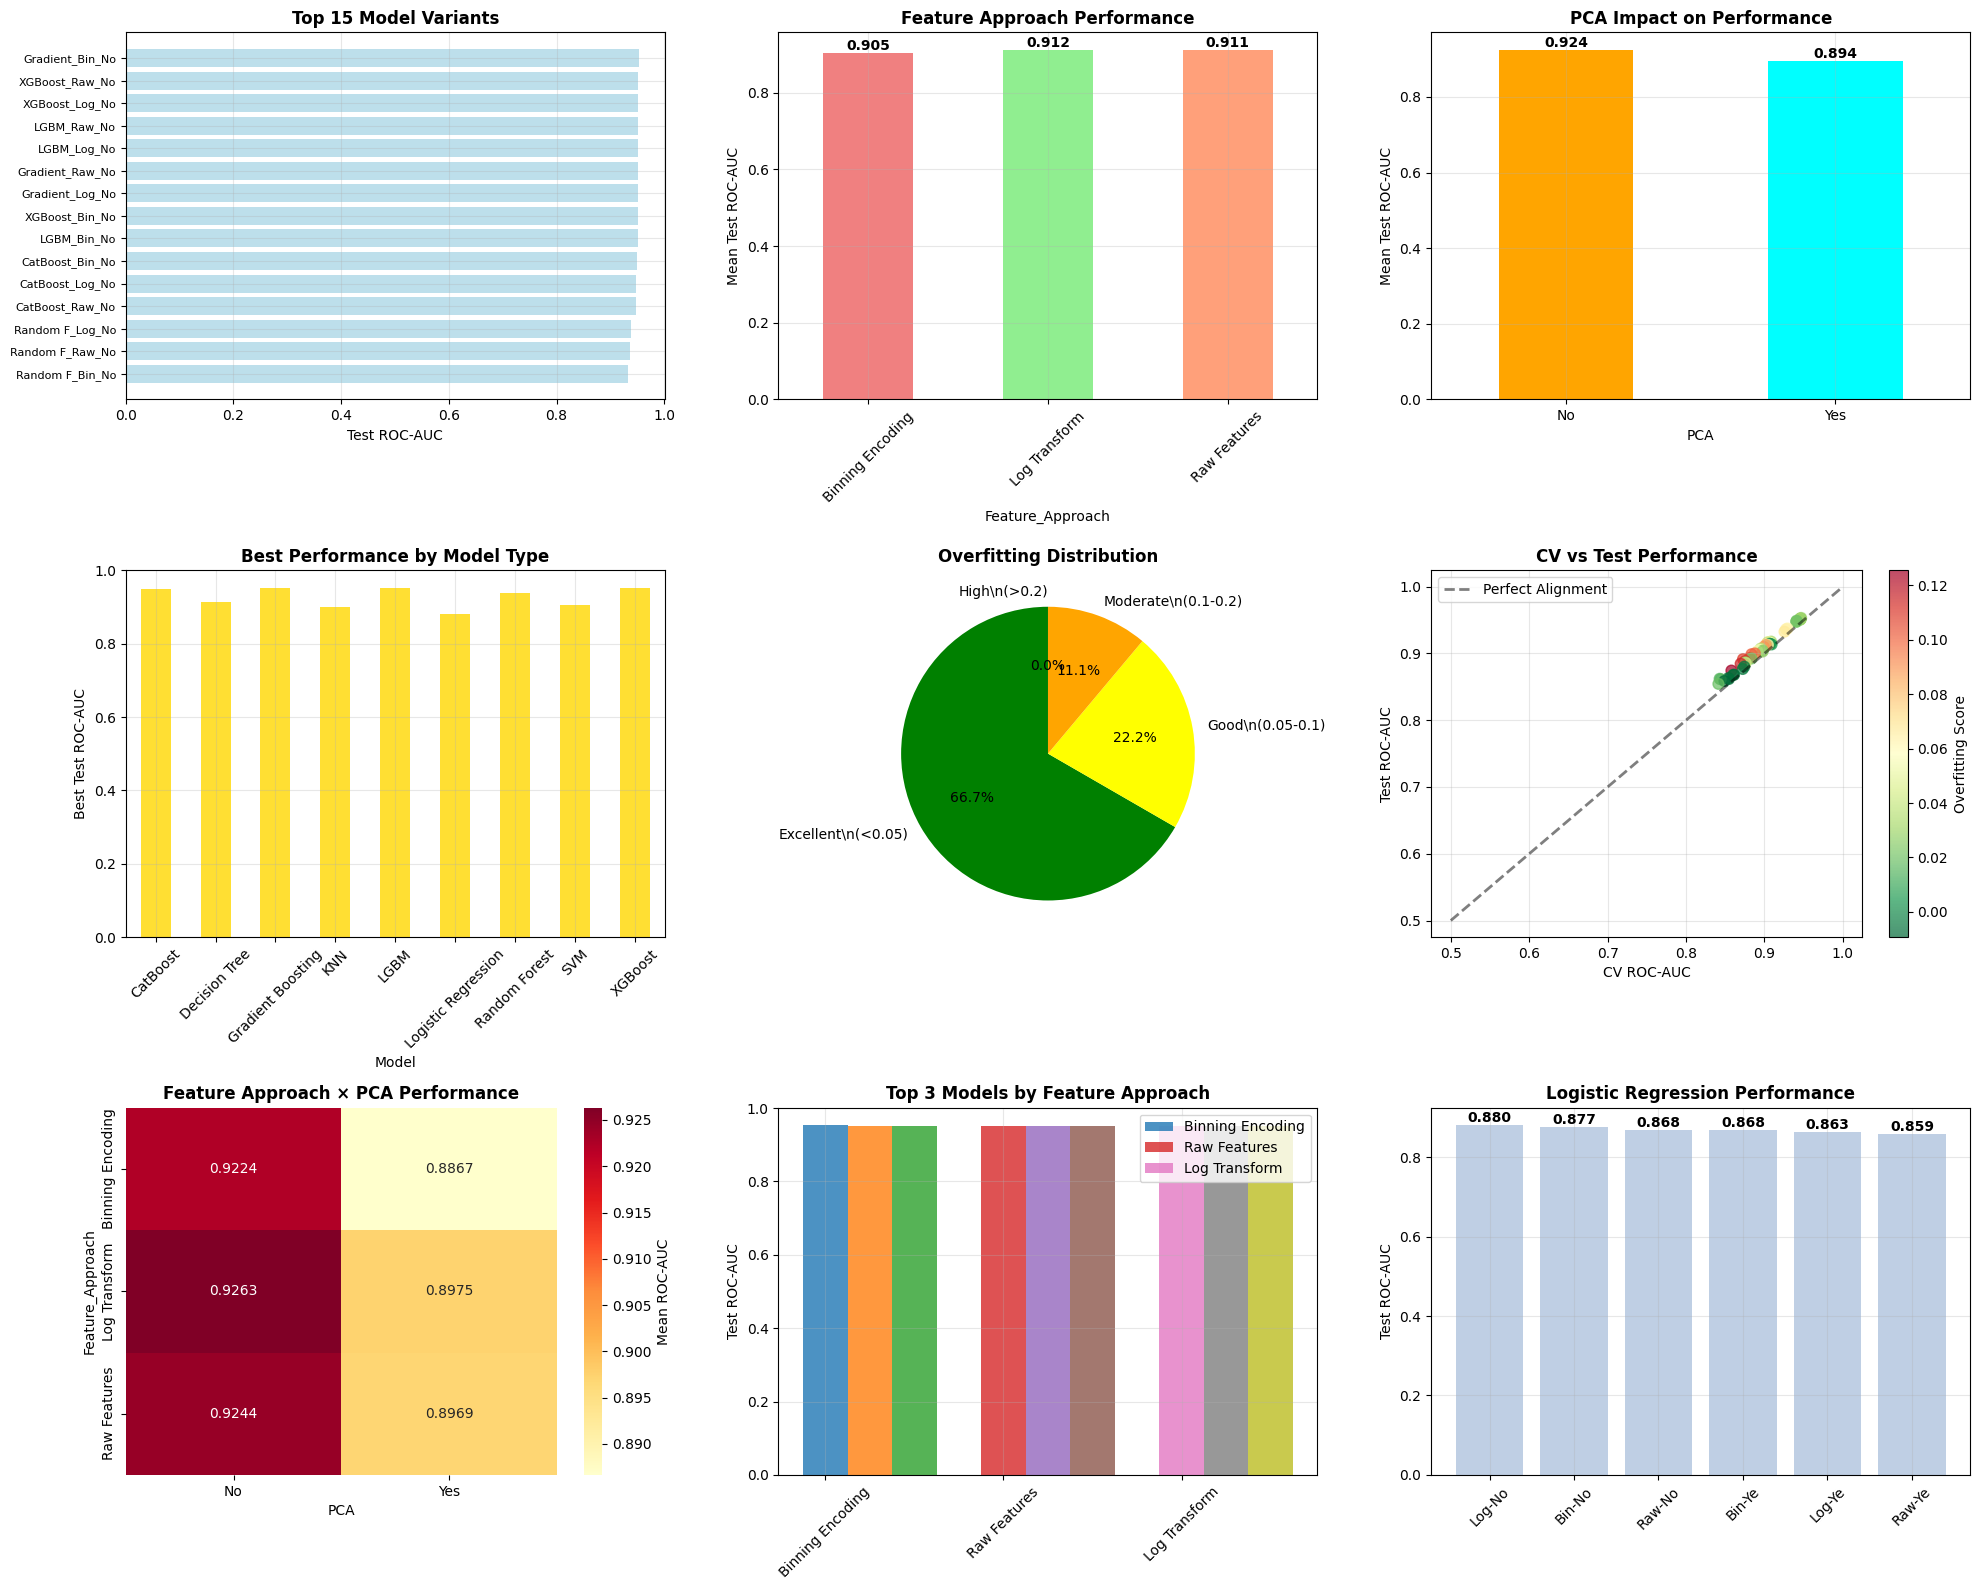

In [20]:
# ============================================================================
# COMPREHENSIVE MODEL EVALUATION SECTION
# ============================================================================

def evaluate_single_model_variant(model, variant_name, training_info, preprocessed_datasets):
    """
    Evaluate a single model variant on the appropriate test set
    """
    try:
        # Get the corresponding dataset for this variant
        feature_approach = training_info['feature_approach']
        dataset_data = preprocessed_datasets[feature_approach]
        
        X_test = dataset_data['X_test']
        y_test = dataset_data['y_test']
        X_train = dataset_data['X_train']
        y_train = dataset_data['y_train']
        
        # Make predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        # Training predictions for overfitting check
        y_train_pred = model.predict(X_train)
        y_train_pred_proba = model.predict_proba(X_train)[:, 1]
        
        # Calculate metrics
        test_metrics = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
            'f1': f1_score(y_test, y_pred, average='weighted', zero_division=0),
            'roc_auc': roc_auc_score(y_test, y_pred_proba),
        }
        
        train_metrics = {
            'accuracy': accuracy_score(y_train, y_train_pred),
            'precision': precision_score(y_train, y_train_pred, average='weighted', zero_division=0),
            'recall': recall_score(y_train, y_train_pred, average='weighted', zero_division=0),
            'f1': f1_score(y_train, y_train_pred, average='weighted', zero_division=0),
            'roc_auc': roc_auc_score(y_train, y_train_pred_proba),
        }
        
        # Calculate overfitting
        overfitting = train_metrics['roc_auc'] - test_metrics['roc_auc']
        
        return {
            'test_metrics': test_metrics,
            'train_metrics': train_metrics,
            'overfitting': overfitting,
            'cv_score': training_info['best_score'],
            'model_name': training_info['model_name'],
            'feature_approach': training_info['feature_approach'],
            'pca_option': training_info['pca_option'],
            'y_test': y_test,
            'y_pred_proba': y_pred_proba,
            'y_train': y_train,
            'y_train_pred_proba': y_train_pred_proba
        }
        
    except Exception as e:
        print(f"    ❌ Error evaluating {variant_name}: {str(e)}")
        return None

def comprehensive_model_evaluation():
    """
    Evaluate all trained model variants
    """
    print(f"📊 COMPREHENSIVE MODEL EVALUATION")
    print("=" * 80)
    
    evaluation_results = {}
    
    print(f"Evaluating {len(best_models)} model variants...")
    
    for variant_name, model in best_models.items():
        if variant_name in training_results:
            training_info = training_results[variant_name]
            
            result = evaluate_single_model_variant(
                model, variant_name, training_info, preprocessed_datasets
            )
            
            if result:
                evaluation_results[variant_name] = result
                print(f"✅ {variant_name}: Test ROC-AUC = {result['test_metrics']['roc_auc']:.4f}")
    
    print(f"\n🎉 EVALUATION COMPLETE!")
    print(f"Successfully evaluated: {len(evaluation_results)} model variants")
    print("=" * 80)
    
    return evaluation_results

def create_comprehensive_results_summary(evaluation_results):
    """
    Create a comprehensive results summary DataFrame with all model variants
    """
    summary_data = []
    
    for variant_name, results in evaluation_results.items():
        # Parse variant name to extract components
        parts = variant_name.split('_')
        
        row = {
            'Variant': variant_name,
            'Model': results['model_name'],
            'Feature_Approach': results['feature_approach'].replace('_', ' ').title(),
            'PCA': 'Yes' if 'PCA' in variant_name and 'NoPCA' not in variant_name else 'No',
            'CV_ROC_AUC': results['cv_score'],
            'Test_ROC_AUC': results['test_metrics']['roc_auc'],
            'Test_Accuracy': results['test_metrics']['accuracy'],
            'Test_Precision': results['test_metrics']['precision'],
            'Test_Recall': results['test_metrics']['recall'],
            'Test_F1': results['test_metrics']['f1'],
            'Train_ROC_AUC': results['train_metrics']['roc_auc'],
            'Overfitting': results['overfitting']
        }
        summary_data.append(row)
    
    if not summary_data:
        return pd.DataFrame()
    
    df_results = pd.DataFrame(summary_data)
    df_results = df_results.sort_values('Test_ROC_AUC', ascending=False)
    df_results = df_results.round(4)
    
    return df_results

def create_comprehensive_visualizations(df_results):
    """
    Create comprehensive visualizations for all model variants
    """
    if df_results.empty:
        print("⚠️ No results to visualize")
        return None
    
    # Set up the plotting style
    plt.style.use('default')
    fig = plt.figure(figsize=(20, 16))
    
    # 1. Top 15 Models Performance
    ax1 = plt.subplot(3, 3, 1)
    top_15 = df_results.head(15)
    bars = ax1.barh(range(len(top_15)), top_15['Test_ROC_AUC'], color='lightblue', alpha=0.8)
    ax1.set_yticks(range(len(top_15)))
    ax1.set_yticklabels([f"{row['Model'][:8]}_{row['Feature_Approach'][:3]}_{row['PCA'][:2]}" 
                        for _, row in top_15.iterrows()], fontsize=8)
    ax1.set_xlabel('Test ROC-AUC')
    ax1.set_title('Top 15 Model Variants', fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.invert_yaxis()
    
    # 2. Feature Approach Comparison
    ax2 = plt.subplot(3, 3, 2)
    feature_comparison = df_results.groupby('Feature_Approach')['Test_ROC_AUC'].agg(['mean', 'max', 'std'])
    bars = feature_comparison['mean'].plot(kind='bar', ax=ax2, color=['lightcoral', 'lightgreen', 'lightsalmon'])
    ax2.set_title('Feature Approach Performance', fontweight='bold')
    ax2.set_ylabel('Mean Test ROC-AUC')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar in bars.patches:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # 3. PCA Impact Analysis
    ax3 = plt.subplot(3, 3, 3)
    pca_comparison = df_results.groupby('PCA')['Test_ROC_AUC'].agg(['mean', 'max', 'std'])
    bars = pca_comparison['mean'].plot(kind='bar', ax=ax3, color=['orange', 'cyan'])
    ax3.set_title('PCA Impact on Performance', fontweight='bold')
    ax3.set_ylabel('Mean Test ROC-AUC')
    ax3.tick_params(axis='x', rotation=0)
    ax3.grid(True, alpha=0.3)
    
    # Add value labels
    for bar in bars.patches:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # 4. Model Type Performance
    ax4 = plt.subplot(3, 3, 4)
    model_comparison = df_results.groupby('Model')['Test_ROC_AUC'].agg(['mean', 'max'])
    bars = model_comparison['max'].plot(kind='bar', ax=ax4, color='gold', alpha=0.8)
    ax4.set_title('Best Performance by Model Type', fontweight='bold')
    ax4.set_ylabel('Best Test ROC-AUC')
    ax4.tick_params(axis='x', rotation=45)
    ax4.grid(True, alpha=0.3)
    
    # 5. Overfitting Analysis
    ax5 = plt.subplot(3, 3, 5)
    overfitting_bins = [-0.1, 0.05, 0.1, 0.2, 1.0]
    overfitting_labels = ['Excellent\\n(<0.05)', 'Good\\n(0.05-0.1)', 'Moderate\\n(0.1-0.2)', 'High\\n(>0.2)']
    df_results['Overfitting_Category'] = pd.cut(df_results['Overfitting'], bins=overfitting_bins, labels=overfitting_labels)
    overfitting_counts = df_results['Overfitting_Category'].value_counts()
    colors = ['green', 'yellow', 'orange', 'red']
    wedges, texts, autotexts = ax5.pie(overfitting_counts.values, labels=overfitting_counts.index, 
                                       autopct='%1.1f%%', colors=colors, startangle=90)
    ax5.set_title('Overfitting Distribution', fontweight='bold')
    
    # 6. CV vs Test Performance
    ax6 = plt.subplot(3, 3, 6)
    scatter = ax6.scatter(df_results['CV_ROC_AUC'], df_results['Test_ROC_AUC'], 
                         alpha=0.7, c=df_results['Overfitting'], cmap='RdYlGn_r', s=60)
    ax6.plot([0.5, 1.0], [0.5, 1.0], 'k--', alpha=0.5, linewidth=2, label='Perfect Alignment')
    ax6.set_xlabel('CV ROC-AUC')
    ax6.set_ylabel('Test ROC-AUC')
    ax6.set_title('CV vs Test Performance', fontweight='bold')
    ax6.legend()
    ax6.grid(True, alpha=0.3)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax6)
    cbar.set_label('Overfitting Score')
    
    # 7. Feature Approach + PCA Heatmap
    ax7 = plt.subplot(3, 3, 7)
    pivot_data = df_results.pivot_table(values='Test_ROC_AUC', index='Feature_Approach', columns='PCA', aggfunc='mean')
    sns.heatmap(pivot_data, annot=True, fmt='.4f', cmap='YlOrRd', ax=ax7, 
                cbar_kws={'label': 'Mean ROC-AUC'})
    ax7.set_title('Feature Approach × PCA Performance', fontweight='bold')
    
    # 8. Model Rankings by Approach
    ax8 = plt.subplot(3, 3, 8)
    top_models_by_approach = []
    for i, approach in enumerate(df_results['Feature_Approach'].unique()):
        approach_data = df_results[df_results['Feature_Approach'] == approach].head(3)
        for j, (_, model_row) in enumerate(approach_data.iterrows()):
            ax8.bar(i + j*0.25, model_row['Test_ROC_AUC'], 
                   width=0.25, label=approach if j == 0 else "", alpha=0.8)
    
    ax8.set_title('Top 3 Models by Feature Approach', fontweight='bold')
    ax8.set_ylabel('Test ROC-AUC')
    ax8.set_xticks(range(len(df_results['Feature_Approach'].unique())))
    ax8.set_xticklabels(df_results['Feature_Approach'].unique(), rotation=45)
    ax8.legend()
    ax8.grid(True, alpha=0.3)
    
    # 9. Baseline Model Analysis
    ax9 = plt.subplot(3, 3, 9)
    baseline_variants = df_results[df_results['Model'] == MODEL_CONFIG['baseline_model']]
    if not baseline_variants.empty:
        bars = ax9.bar(range(len(baseline_variants)), baseline_variants['Test_ROC_AUC'], 
                      color='lightsteelblue', alpha=0.8)
        ax9.set_title(f'{MODEL_CONFIG["baseline_model"]} Performance', fontweight='bold')
        ax9.set_ylabel('Test ROC-AUC')
        ax9.set_xticks(range(len(baseline_variants)))
        ax9.set_xticklabels([f"{row['Feature_Approach'][:3]}-{row['PCA'][:2]}" 
                            for _, row in baseline_variants.iterrows()], rotation=45)
        
        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax9.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
    ax9.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return fig

# ============================================================================
# EXECUTE COMPREHENSIVE EVALUATION
# ============================================================================

print(f"🚀 Starting comprehensive evaluation of all model variants...")
evaluation_results = comprehensive_model_evaluation()

# Create comprehensive results summary
results_summary = create_comprehensive_results_summary(evaluation_results)

if not results_summary.empty:
    print(f"\n📊 COMPREHENSIVE MODEL PERFORMANCE SUMMARY:")
    print("=" * 80)
    print(f"Total Model Variants: {len(results_summary)}")
    print(f"Feature Approaches: {results_summary['Feature_Approach'].nunique()}")
    print(f"Models: {results_summary['Model'].nunique()}")
    print(f"PCA Variations: {results_summary['PCA'].nunique()}")
    
    # Display top 15 results
    print(f"\n🏆 TOP 15 PERFORMING MODEL VARIANTS:")
    top_15 = results_summary.head(15)[['Variant', 'Model', 'Feature_Approach', 'PCA', 'Train_ROC_AUC', 'Test_ROC_AUC', 'Overfitting']]
    display(top_15)
    
    # Create comprehensive visualizations
    print(f"\n📈 Creating comprehensive performance visualizations...")
    fig = create_comprehensive_visualizations(results_summary)
    
else:
    print("⚠️ No evaluation results to display")


## 7.0. Model Performance Ranking

Create bar plots to rank all models by their training and test ROC-AUC scores for comprehensive comparison.


🚀 Creating Model Performance Ranking Plots...
📊 Creating Model Performance Ranking Plots...


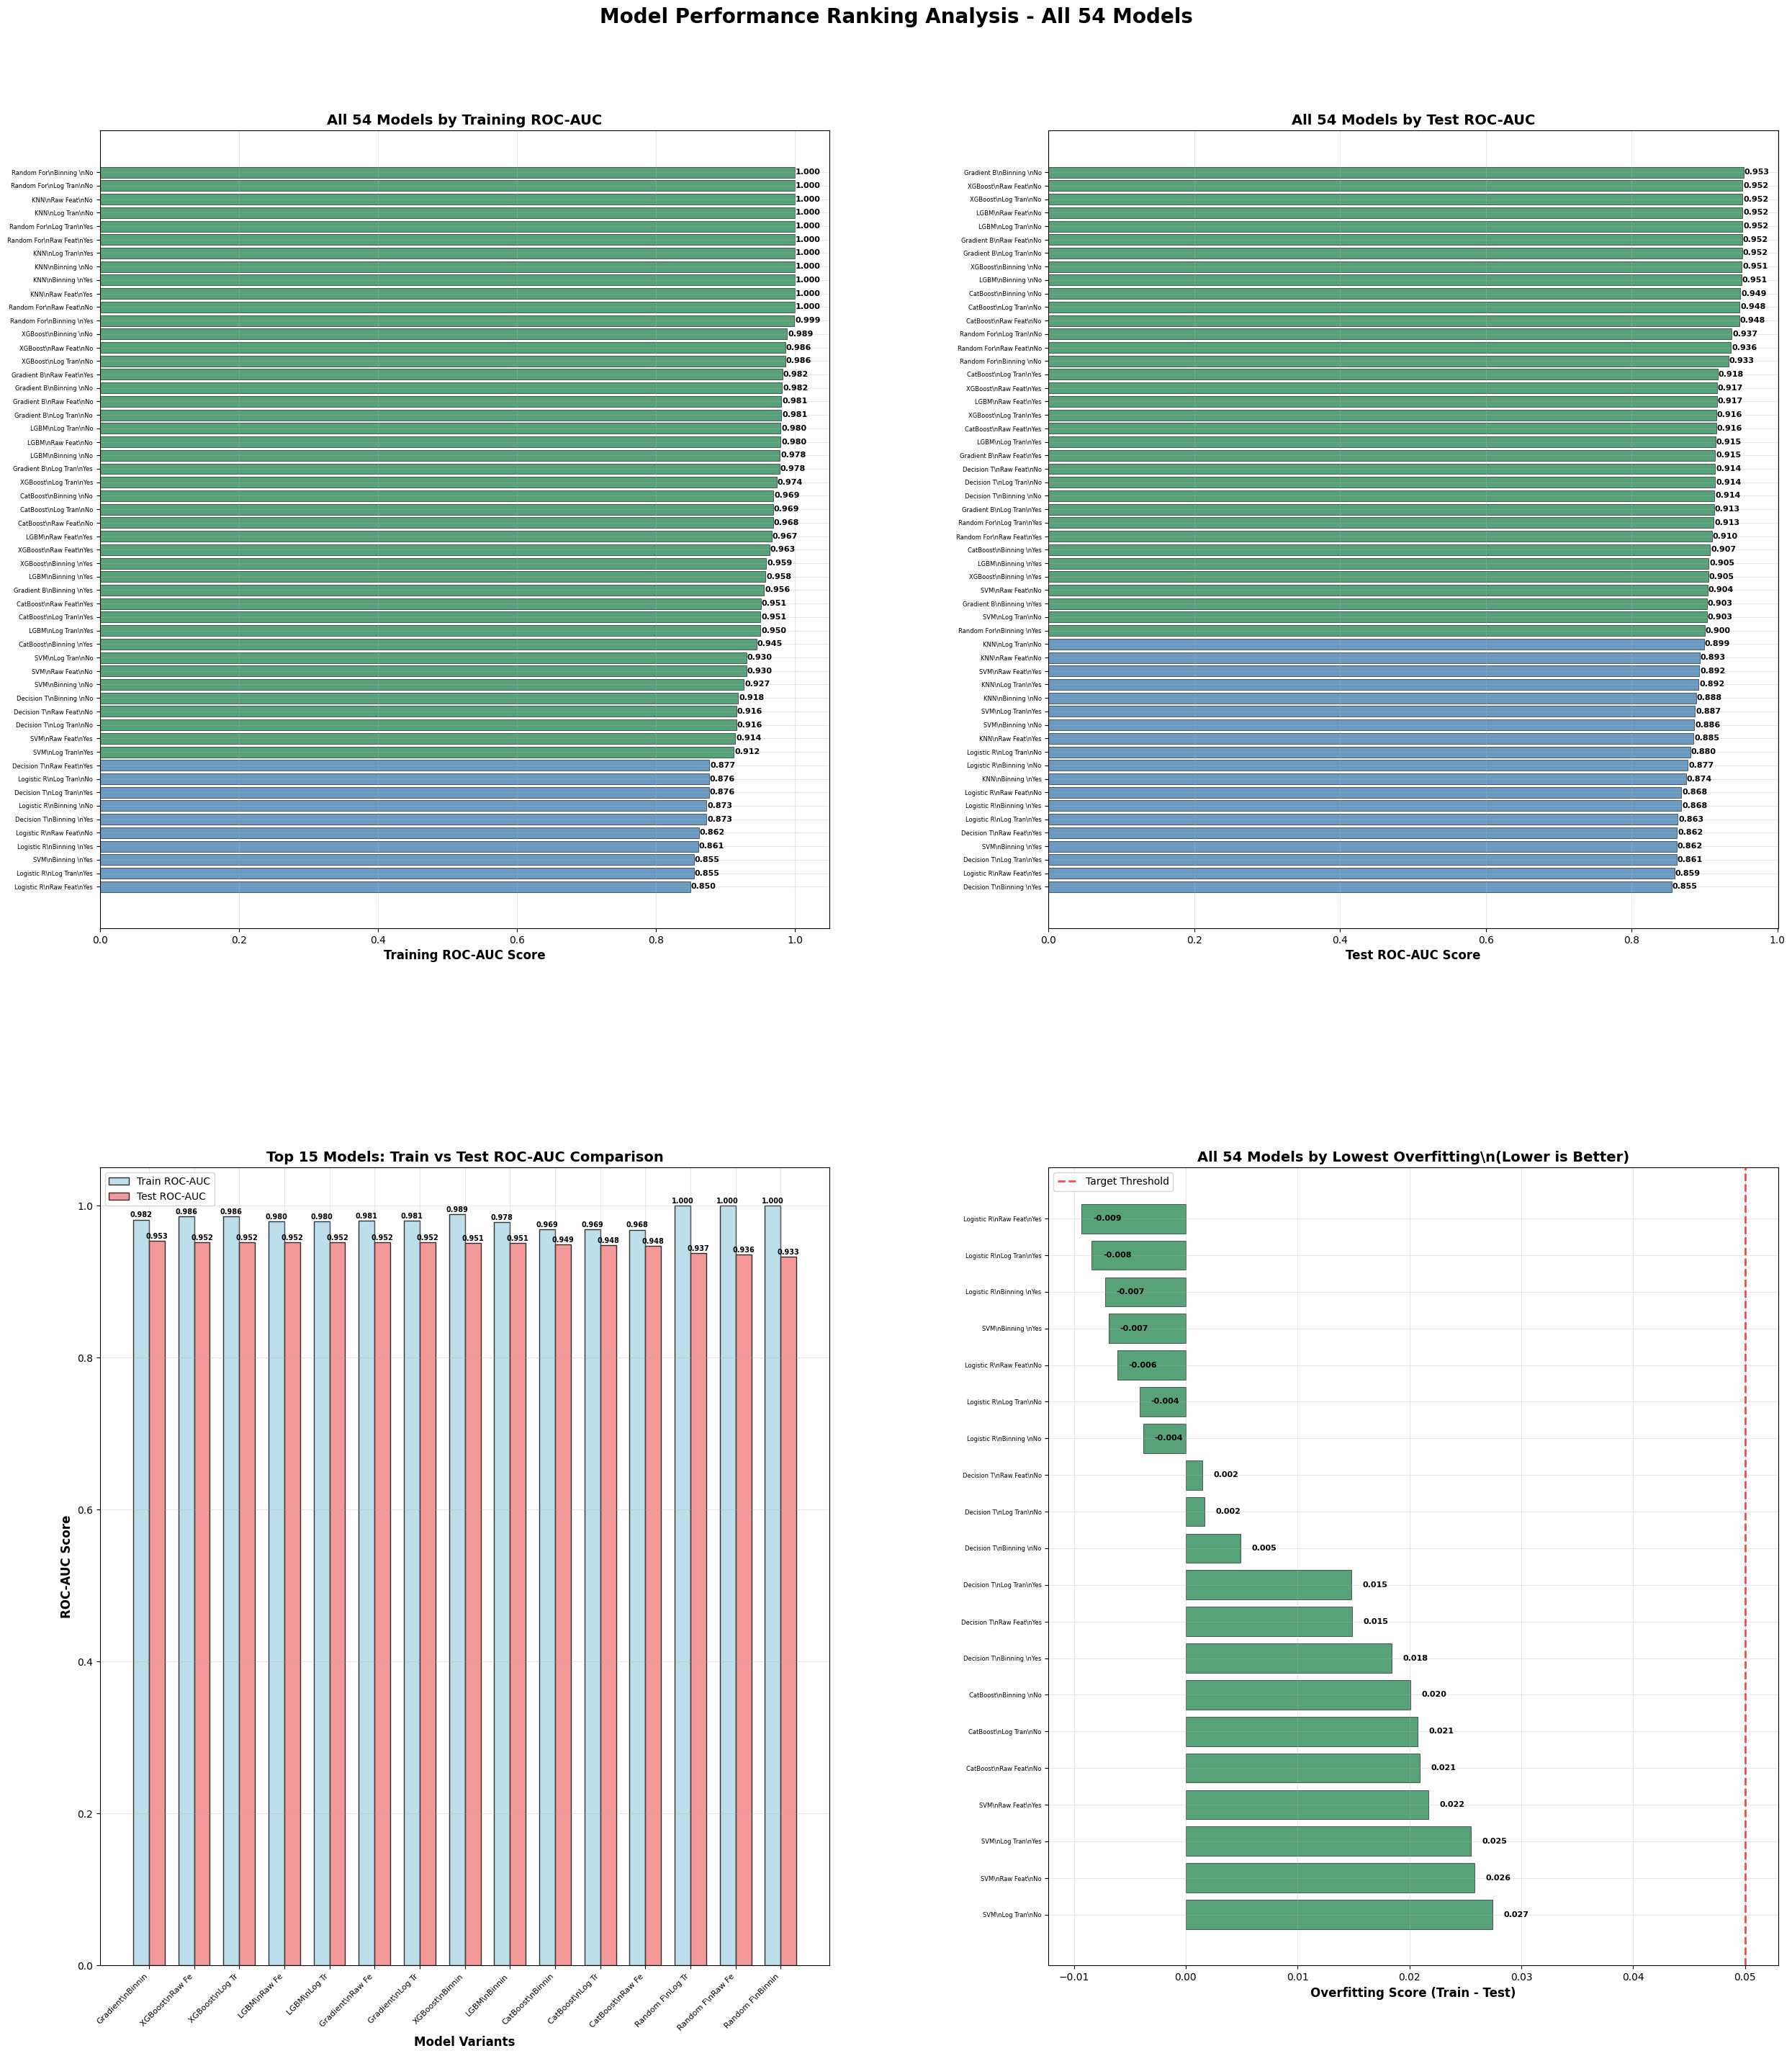

\n📈 MODEL PERFORMANCE RANKING SUMMARY:
\n🏆 TOP PERFORMERS:
Best Training Performance: Random Forest_log_transform_NoPCA (ROC-AUC: 1.0000)
Best Test Performance: Gradient Boosting_binning_encoding_NoPCA (ROC-AUC: 0.9533)
Most Balanced Model: Logistic Regression_raw_features_PCA (Overfitting: -0.0093)
\n📊 PERFORMANCE DISTRIBUTION:
Excellent Models (≥0.9): 35
Good Models (0.8-0.9): 19
Fair Models (0.7-0.8): 0
Poor Models (<0.7): 0
\n🎯 OVERFITTING ANALYSIS:
Low Overfitting (<0.05): 35
Medium Overfitting (0.05-0.1): 13
High Overfitting (≥0.1): 6
✅ Model Performance Ranking Plots completed!


In [21]:
# ============================================================================
# MODEL PERFORMANCE RANKING BAR PLOTS
# ============================================================================

def create_model_performance_ranking_plots(df_results):
    """
    Create bar plots to rank all models by their training and test ROC-AUC scores
    """
    print("📊 Creating Model Performance Ranking Plots...")
    
    if df_results.empty:
        print("⚠️ No results to visualize")
        return
    
    # Create figure with subplots - Adjusted size for 54 models
    fig, axes = plt.subplots(2, 2, figsize=(25, 30))
    fig.suptitle('Model Performance Ranking Analysis - All 54 Models', fontsize=20, fontweight='bold')
    
    # 1. Train ROC-AUC Ranking (All 54 models)
    ax1 = axes[0, 0]
    train_ranking = df_results.sort_values('Train_ROC_AUC', ascending=False)
    
    # Create color map based on performance
    colors = ['#2E8B57' if x >= 0.9 else '#4682B4' if x >= 0.8 else '#DAA520' if x >= 0.7 else '#CD5C5C' 
              for x in train_ranking['Train_ROC_AUC']]
    
    bars = ax1.barh(range(len(train_ranking)), train_ranking['Train_ROC_AUC'], 
                    color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
    
    # Customize the plot
    ax1.set_yticks(range(len(train_ranking)))
    ax1.set_yticklabels([f"{row['Model'][:10]}\\n{row['Feature_Approach'][:8]}\\n{row['PCA'][:3]}" 
                        for _, row in train_ranking.iterrows()], fontsize=6)
    ax1.set_xlabel('Training ROC-AUC Score', fontsize=12, fontweight='bold')
    ax1.set_title('All 54 Models by Training ROC-AUC', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.invert_yaxis()
    
    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, train_ranking['Train_ROC_AUC'])):
        ax1.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
                f'{value:.3f}', va='center', fontweight='bold', fontsize=8)
    
    # 2. Test ROC-AUC Ranking (All 54 models)
    ax2 = axes[0, 1]
    test_ranking = df_results.sort_values('Test_ROC_AUC', ascending=False)
    
    # Create color map based on performance
    colors = ['#2E8B57' if x >= 0.9 else '#4682B4' if x >= 0.8 else '#DAA520' if x >= 0.7 else '#CD5C5C' 
              for x in test_ranking['Test_ROC_AUC']]
    
    bars = ax2.barh(range(len(test_ranking)), test_ranking['Test_ROC_AUC'], 
                    color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
    
    # Customize the plot
    ax2.set_yticks(range(len(test_ranking)))
    ax2.set_yticklabels([f"{row['Model'][:10]}\\n{row['Feature_Approach'][:8]}\\n{row['PCA'][:3]}" 
                        for _, row in test_ranking.iterrows()], fontsize=6)
    ax2.set_xlabel('Test ROC-AUC Score', fontsize=12, fontweight='bold')
    ax2.set_title('All 54 Models by Test ROC-AUC', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.invert_yaxis()
    
    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, test_ranking['Test_ROC_AUC'])):
        ax2.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
                f'{value:.3f}', va='center', fontweight='bold', fontsize=8)
    
    # 3. Side-by-side comparison of Top 15 models (Train vs Test)
    ax3 = axes[1, 0]
    top_15_models = df_results.sort_values('Test_ROC_AUC', ascending=False).head(15)
    
    x_pos = np.arange(len(top_15_models))
    width = 0.35
    
    bars1 = ax3.bar(x_pos - width/2, top_15_models['Train_ROC_AUC'], width, 
                   label='Train ROC-AUC', color='lightblue', alpha=0.8, edgecolor='black')
    bars2 = ax3.bar(x_pos + width/2, top_15_models['Test_ROC_AUC'], width, 
                   label='Test ROC-AUC', color='lightcoral', alpha=0.8, edgecolor='black')
    
    ax3.set_xlabel('Model Variants', fontsize=12, fontweight='bold')
    ax3.set_ylabel('ROC-AUC Score', fontsize=12, fontweight='bold')
    ax3.set_title('Top 15 Models: Train vs Test ROC-AUC Comparison', fontsize=14, fontweight='bold')
    ax3.set_xticks(x_pos)
    ax3.set_xticklabels([f"{row['Model'][:8]}\\n{row['Feature_Approach'][:6]}" 
                        for _, row in top_15_models.iterrows()], rotation=45, ha='right', fontsize=8)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                    f'{height:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=7)
    
    # 4. Overfitting Analysis (Train - Test difference)
    ax4 = axes[1, 1]
    
    # Calculate overfitting score for visualization
    overfitting_data = df_results.copy()
    overfitting_data['Overfitting_Score'] = overfitting_data['Train_ROC_AUC'] - overfitting_data['Test_ROC_AUC']
    overfitting_ranking = overfitting_data.sort_values('Overfitting_Score', ascending=True).head(20)
    
    # Create color map based on overfitting level
    colors = ['#2E8B57' if x < 0.05 else '#4682B4' if x < 0.1 else '#DAA520' if x < 0.15 else '#CD5C5C' 
              for x in overfitting_ranking['Overfitting_Score']]
    
    bars = ax4.barh(range(len(overfitting_ranking)), overfitting_ranking['Overfitting_Score'], 
                    color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
    
    # Customize the plot
    ax4.set_yticks(range(len(overfitting_ranking)))
    ax4.set_yticklabels([f"{row['Model'][:10]}\\n{row['Feature_Approach'][:8]}\\n{row['PCA'][:3]}" 
                        for _, row in overfitting_ranking.iterrows()], fontsize=6)
    ax4.set_xlabel('Overfitting Score (Train - Test)', fontsize=12, fontweight='bold')
    ax4.set_title('All 54 Models by Lowest Overfitting\\n(Lower is Better)', fontsize=14, fontweight='bold')
    ax4.grid(True, alpha=0.3)
    ax4.invert_yaxis()
    
    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, overfitting_ranking['Overfitting_Score'])):
        ax4.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
                f'{value:.3f}', va='center', fontweight='bold', fontsize=8)
    
    # Add vertical line at 0.05 (good overfitting threshold)
    ax4.axvline(x=0.05, color='red', linestyle='--', alpha=0.7, linewidth=2, label='Target Threshold')
    ax4.legend()
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for all 54 models
    plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Add more space between subplots
    plt.show()
    
    # Print summary statistics
    print(f"\\n📈 MODEL PERFORMANCE RANKING SUMMARY:")
    print("=" * 60)
    
    # Best performers
    best_train = df_results.loc[df_results['Train_ROC_AUC'].idxmax()]
    best_test = df_results.loc[df_results['Test_ROC_AUC'].idxmax()]
    best_balanced = df_results.loc[df_results['Overfitting'].idxmin()]
    
    print(f"\\n🏆 TOP PERFORMERS:")
    print(f"Best Training Performance: {best_train['Variant']} (ROC-AUC: {best_train['Train_ROC_AUC']:.4f})")
    print(f"Best Test Performance: {best_test['Variant']} (ROC-AUC: {best_test['Test_ROC_AUC']:.4f})")
    print(f"Most Balanced Model: {best_balanced['Variant']} (Overfitting: {best_balanced['Overfitting']:.4f})")
    
    # Performance distribution
    print(f"\\n📊 PERFORMANCE DISTRIBUTION:")
    excellent_models = len(df_results[df_results['Test_ROC_AUC'] >= 0.9])
    good_models = len(df_results[(df_results['Test_ROC_AUC'] >= 0.8) & (df_results['Test_ROC_AUC'] < 0.9)])
    fair_models = len(df_results[(df_results['Test_ROC_AUC'] >= 0.7) & (df_results['Test_ROC_AUC'] < 0.8)])
    poor_models = len(df_results[df_results['Test_ROC_AUC'] < 0.7])
    
    print(f"Excellent Models (≥0.9): {excellent_models}")
    print(f"Good Models (0.8-0.9): {good_models}")
    print(f"Fair Models (0.7-0.8): {fair_models}")
    print(f"Poor Models (<0.7): {poor_models}")
    
    # Overfitting analysis
    low_overfitting = len(df_results[df_results['Overfitting'] < 0.05])
    medium_overfitting = len(df_results[(df_results['Overfitting'] >= 0.05) & (df_results['Overfitting'] < 0.1)])
    high_overfitting = len(df_results[df_results['Overfitting'] >= 0.1])
    
    print(f"\\n🎯 OVERFITTING ANALYSIS:")
    print(f"Low Overfitting (<0.05): {low_overfitting}")
    print(f"Medium Overfitting (0.05-0.1): {medium_overfitting}")
    print(f"High Overfitting (≥0.1): {high_overfitting}")
    
    return fig

# ============================================================================
# EXECUTE MODEL PERFORMANCE RANKING PLOTS
# ============================================================================

if not results_summary.empty:
    print("🚀 Creating Model Performance Ranking Plots...")
    ranking_fig = create_model_performance_ranking_plots(results_summary)
    print("✅ Model Performance Ranking Plots completed!")
else:
    print("⚠️ No results available for ranking plots")


## 7.1. Advanced Visualizations

Create specialized visualizations for ROC curves, Logistic Regression analysis, and top model comparisons.


🚀 Creating advanced visualizations...
\n============================================================
📈 Creating comprehensive ROC curves for all models...


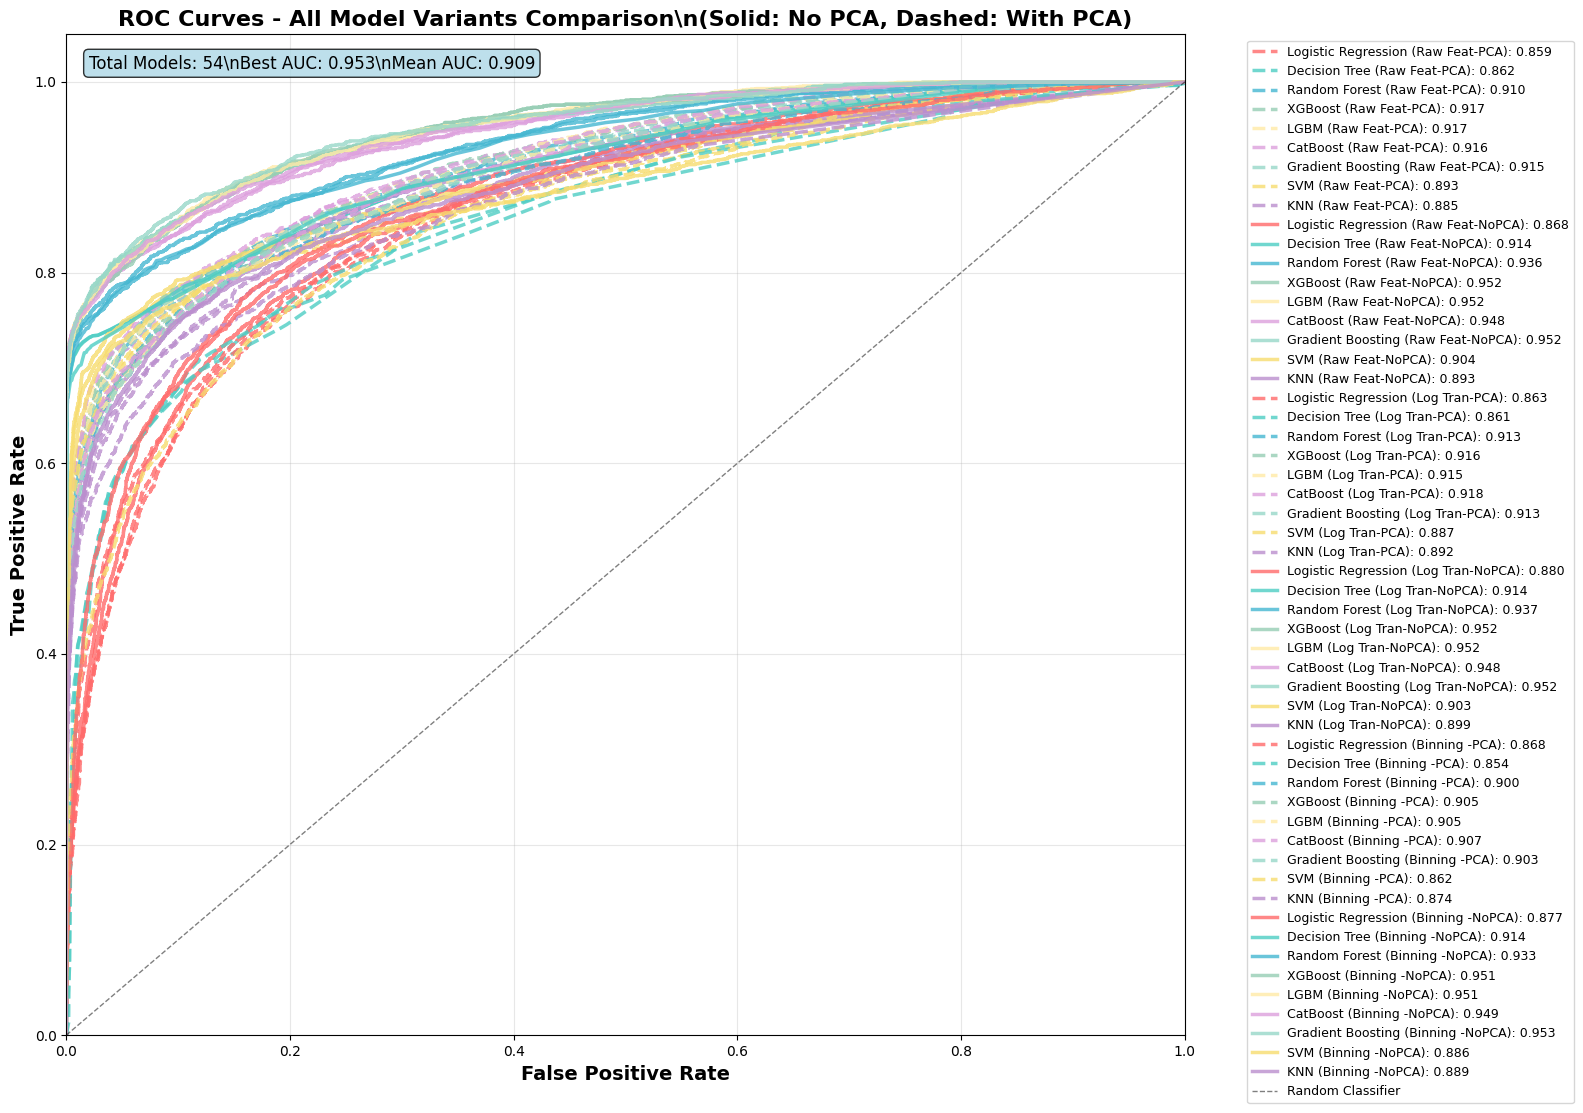

\n============================================================
🎯 Creating Logistic Regression performance analysis...


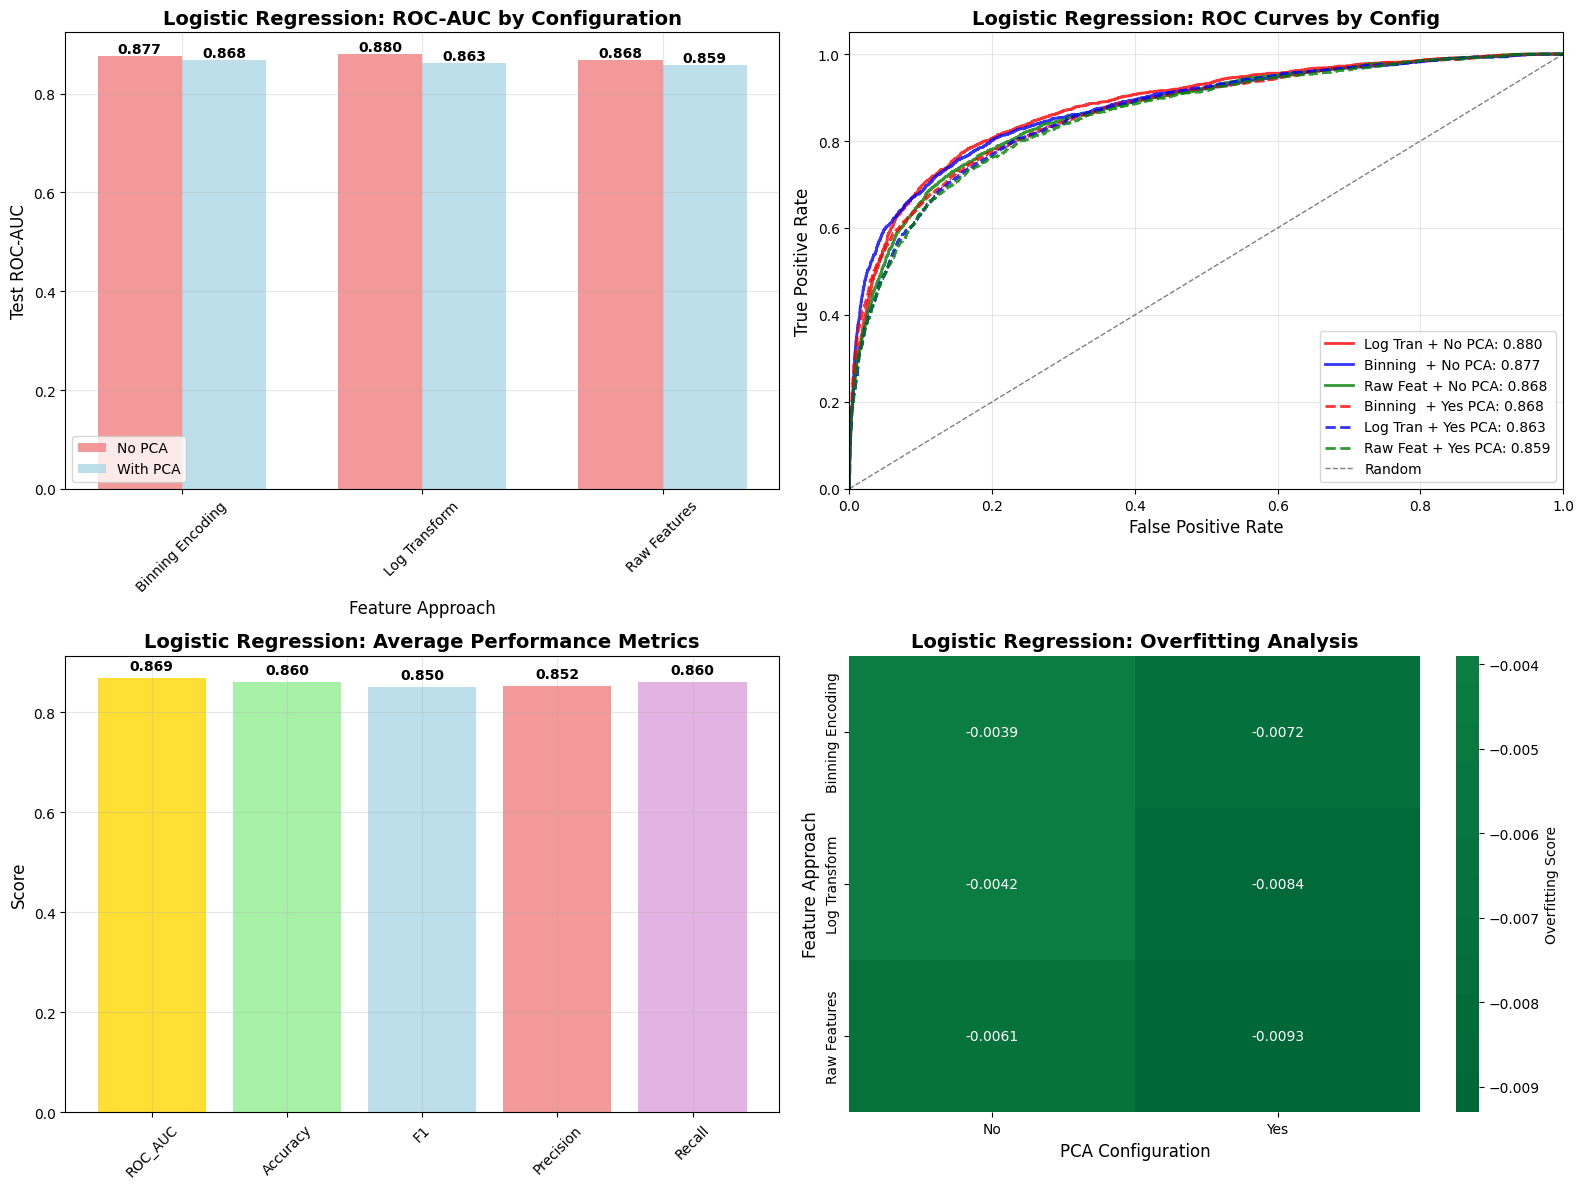

\n🎯 LOGISTIC REGRESSION ANALYSIS SUMMARY:
🏆 Best Configuration:
   Feature Approach: Log Transform
   PCA: No
   ROC-AUC: 0.8803
   Overfitting: -0.0042
\n📊 Performance by Configuration:
   Log Transform + No PCA: 0.8803 ROC-AUC
   Binning Encoding + No PCA: 0.8768 ROC-AUC
   Raw Features + No PCA: 0.8681 ROC-AUC
   Binning Encoding + Yes PCA: 0.8680 ROC-AUC
   Log Transform + Yes PCA: 0.8631 ROC-AUC
   Raw Features + Yes PCA: 0.8588 ROC-AUC
\n============================================================
🏆 Creating analysis for TOP 3 MODELS + LR BASELINE...
📊 Added Logistic Regression baseline: Logistic Regression_log_transform_NoPCA (ROC-AUC: 0.8803)
\n🎯 TOP 3 MODELS + BASELINE:
  #1: Gradient Boosting_binning_encoding_NoPCA (ROC-AUC: 0.9533)
  #2: XGBoost_raw_features_NoPCA (ROC-AUC: 0.9520)
  #3: XGBoost_log_transform_NoPCA (ROC-AUC: 0.9520)
  #4: Logistic Regression_log_transform_NoPCA (LR Baseline) (ROC-AUC: 0.8803)


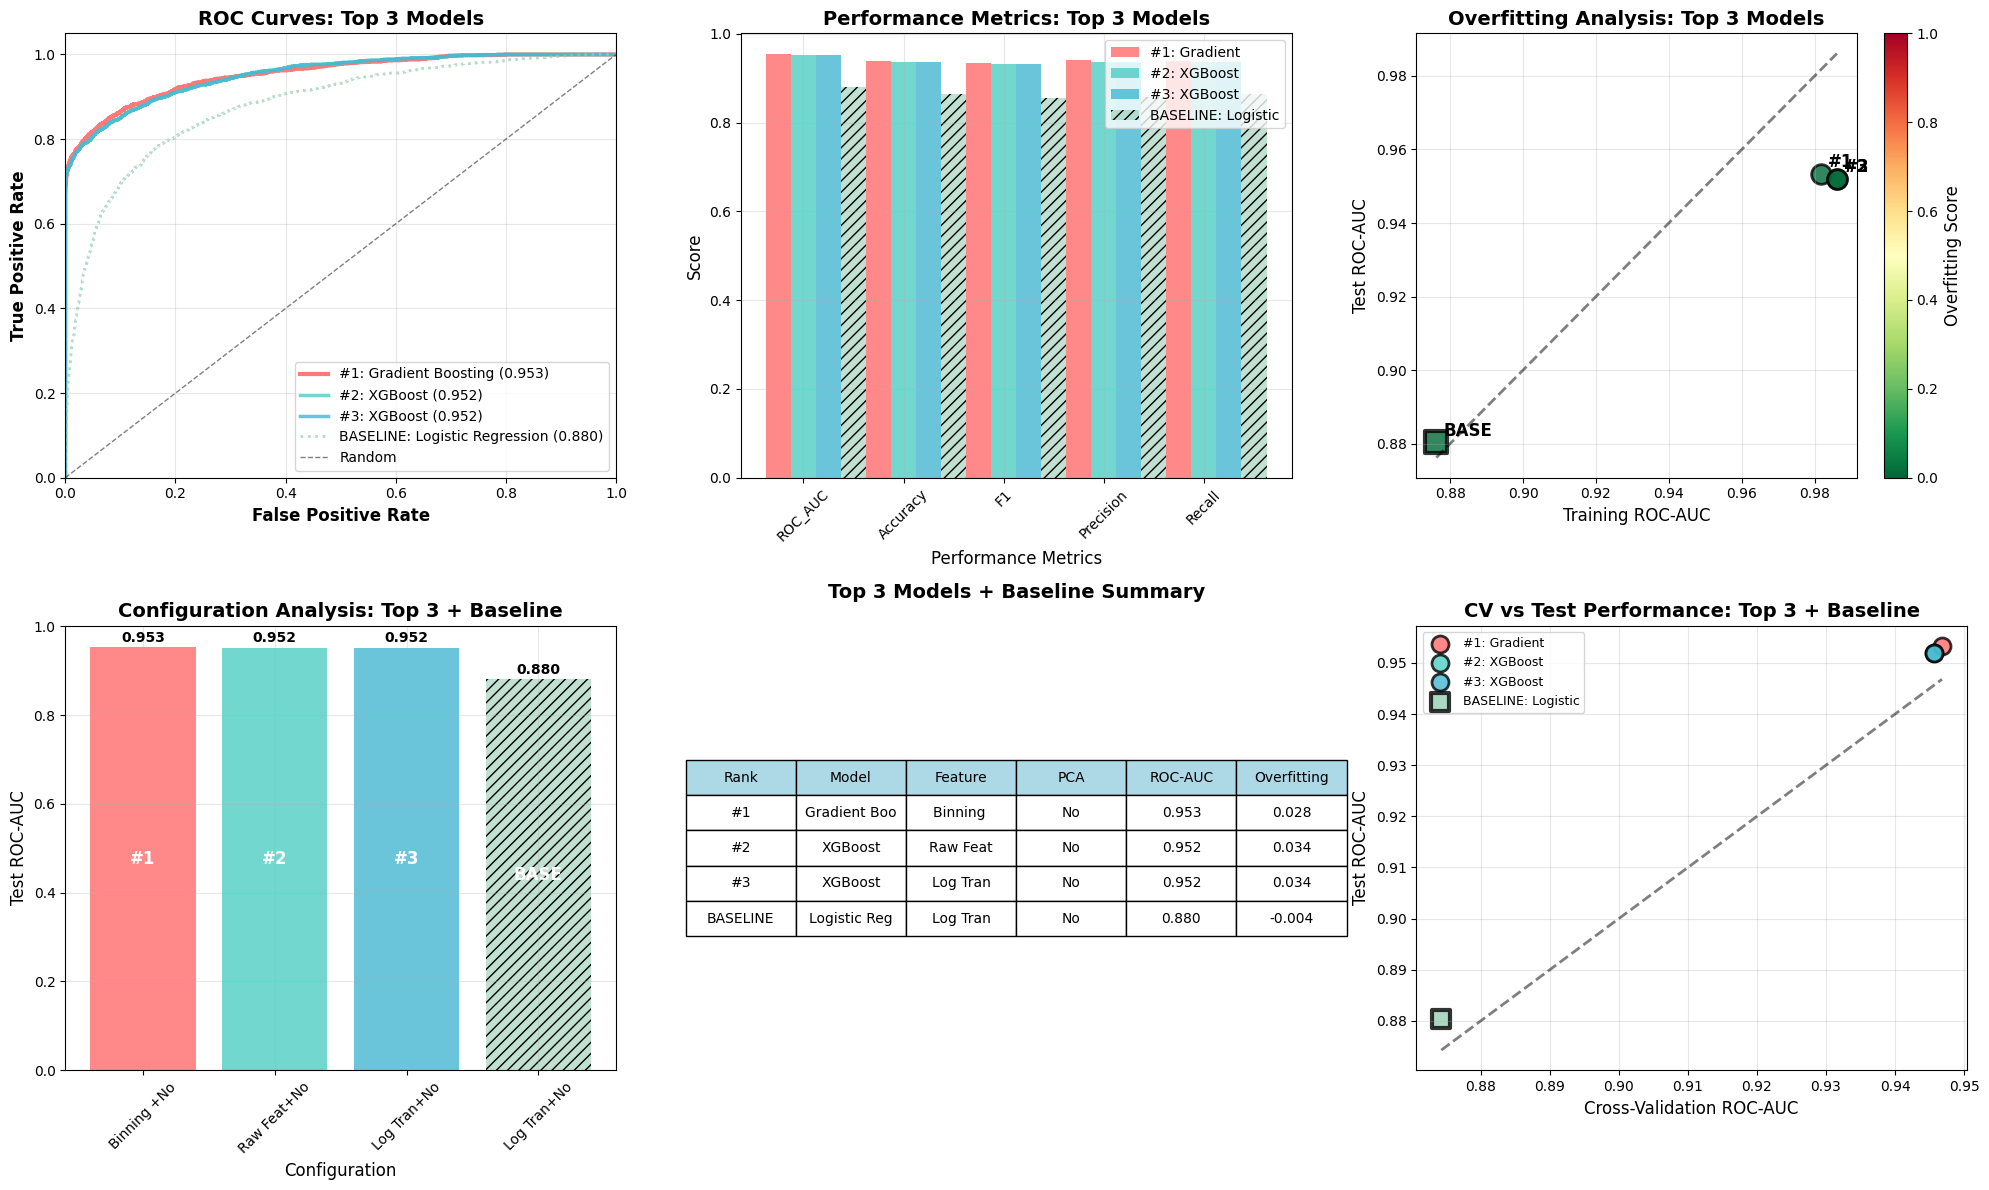

\n📊 DETAILED COMPARISON:
\n🥇 CHAMPION (#1):
  Model: Gradient Boosting
  Configuration: Binning Encoding + No PCA
  Test ROC-AUC: 0.9533
  CV ROC-AUC: 0.9468
  Overfitting: 0.0283
  Accuracy: 0.9382
  F1-Score: 0.9349
\n🥈 TOP 2:
  Model: XGBoost
  Configuration: Raw Features + No PCA
  Test ROC-AUC: 0.9520
  CV ROC-AUC: 0.9456
  Overfitting: 0.0341
  Accuracy: 0.9360
  F1-Score: 0.9328
\n🥈 TOP 3:
  Model: XGBoost
  Configuration: Log Transform + No PCA
  Test ROC-AUC: 0.9520
  CV ROC-AUC: 0.9456
  Overfitting: 0.0341
  Accuracy: 0.9360
  F1-Score: 0.9328
\n📊 LOGISTIC REGRESSION BASELINE:
  Model: Logistic Regression
  Configuration: Log Transform + No PCA
  Test ROC-AUC: 0.8803
  CV ROC-AUC: 0.8743
  Overfitting: -0.0042
  Accuracy: 0.8643
  F1-Score: 0.8555
  📈 Baseline Performance for Comparison
\n📊 BASELINE COMPARISON:
  Champion vs Baseline ROC-AUC: 0.9533 vs 0.8803
  Absolute Improvement: 0.0730
  Relative Improvement: 8.29%
\n🎉 Advanced visualizations completed!


In [22]:
# ============================================================================
# ADVANCED VISUALIZATION FUNCTIONS
# ============================================================================

def create_all_models_roc_curves(evaluation_results):
    """
    Create ROC curves for all models in one comprehensive plot
    """
    print(f"📈 Creating comprehensive ROC curves for all models...")
    
    if not evaluation_results:
        print("⚠️ No evaluation results to plot")
        return None, None
    
    # Set up the plot
    plt.figure(figsize=(16, 12))
    
    # Define colors for different models
    model_colors = {
        'Logistic Regression': '#FF6B6B',
        'Decision Tree': '#4ECDC4', 
        'Random Forest': '#45B7D1',
        'XGBoost': '#96CEB4',
        'LGBM': '#FFEAA7',
        'CatBoost': '#DDA0DD',
        'Gradient Boosting': '#98D8C8',
        'SVM': '#F7DC6F',
        'KNN': '#BB8FCE'
    }
    
    # Plot ROC curves for all model variants
    all_aucs = []
    
    for variant_name, results in evaluation_results.items():
        model_name = results['model_name']
        feature_approach = results['feature_approach']
        pca_option = results['pca_option']
        y_test = results['y_test']
        y_pred_proba = results['y_pred_proba']
        
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        all_aucs.append(roc_auc)
        
        # Create label
        pca_suffix = "PCA" if pca_option == "with_pca" else "NoPCA"
        feature_suffix = feature_approach.replace('_', ' ').title()[:8]
        label = f"{model_name} ({feature_suffix}-{pca_suffix}): {roc_auc:.3f}"
        
        # Plot curve
        color = model_colors.get(model_name, '#333333')
        linestyle = '-' if pca_option == "without_pca" else '--'
        alpha = 0.8 if roc_auc > 0.85 else 0.6
        linewidth = 2.5 if roc_auc > 0.85 else 1.5
        
        plt.plot(fpr, tpr, color=color, linestyle=linestyle, 
                linewidth=linewidth, alpha=alpha, label=label)
    
    # Plot diagonal line
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, linewidth=1, label='Random Classifier')
    
    # Customize plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
    plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
    plt.title('ROC Curves - All Model Variants Comparison\\n(Solid: No PCA, Dashed: With PCA)', 
              fontsize=16, fontweight='bold')
    
    # Add legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    plt.grid(True, alpha=0.3)
    
    # Add statistics text
    plt.text(0.02, 0.98, f'Total Models: {len(evaluation_results)}\\nBest AUC: {max(all_aucs):.3f}\\nMean AUC: {np.mean(all_aucs):.3f}', 
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    return max(all_aucs), np.mean(all_aucs)

def create_logistic_regression_analysis(results_summary, evaluation_results):
    """
    Create comprehensive analysis for Logistic Regression performance across configurations
    """
    print(f"🎯 Creating Logistic Regression performance analysis...")
    
    # Filter for Logistic Regression models only
    lr_results = results_summary[results_summary['Model'] == 'Logistic Regression'].copy()
    
    if len(lr_results) == 0:
        print("⚠️ No Logistic Regression results found!")
        return
    
    # Create comprehensive plot
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. ROC-AUC by Feature Approach and PCA
    ax1 = axes[0, 0]
    lr_pivot = lr_results.pivot_table(values='Test_ROC_AUC', 
                                      index='Feature_Approach', 
                                      columns='PCA', 
                                      aggfunc='mean')
    
    # Create grouped bar chart
    x = np.arange(len(lr_pivot.index))
    width = 0.35
    
    bars1 = ax1.bar(x - width/2, lr_pivot['No'], width, label='No PCA', color='lightcoral', alpha=0.8)
    bars2 = ax1.bar(x + width/2, lr_pivot['Yes'], width, label='With PCA', color='lightblue', alpha=0.8)
    
    ax1.set_title('Logistic Regression: ROC-AUC by Configuration', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Test ROC-AUC', fontsize=12)
    ax1.set_xlabel('Feature Approach', fontsize=12)
    ax1.set_xticks(x)
    ax1.set_xticklabels(lr_pivot.index, rotation=45)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if not np.isnan(height):
                ax1.text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # 2. ROC Curves for LR variants
    ax2 = axes[0, 1]
    
    colors = ['red', 'blue', 'green']
    linestyles = ['-', '--']
    
    for i, (_, lr_row) in enumerate(lr_results.iterrows()):
        variant_name = lr_row['Variant']
        if variant_name in evaluation_results:
            results = evaluation_results[variant_name]
            y_test = results['y_test']
            y_pred_proba = results['y_pred_proba']
            
            # Calculate ROC curve
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            
            # Style based on configuration
            feature_short = lr_row['Feature_Approach'][:8]
            pca_style = '--' if lr_row['PCA'] == 'Yes' else '-'
            color = colors[i % len(colors)]
            
            label = f"{feature_short} + {lr_row['PCA']} PCA: {roc_auc:.3f}"
            ax2.plot(fpr, tpr, color=color, linestyle=pca_style, 
                    linewidth=2, alpha=0.8, label=label)
    
    # Plot diagonal
    ax2.plot([0, 1], [0, 1], 'k--', alpha=0.5, linewidth=1, label='Random')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate', fontsize=12)
    ax2.set_ylabel('True Positive Rate', fontsize=12)
    ax2.set_title('Logistic Regression: ROC Curves by Config', fontsize=14, fontweight='bold')
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)
    
    # 3. Detailed Performance Metrics
    ax3 = axes[1, 0]
    metrics = ['Test_ROC_AUC', 'Test_Accuracy', 'Test_F1', 'Test_Precision', 'Test_Recall']
    lr_metrics = lr_results[metrics].mean()
    
    bars = ax3.bar(range(len(metrics)), lr_metrics.values, 
                   color=['gold', 'lightgreen', 'lightblue', 'lightcoral', 'plum'], alpha=0.8)
    ax3.set_title('Logistic Regression: Average Performance Metrics', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Score', fontsize=12)
    ax3.set_xticks(range(len(metrics)))
    ax3.set_xticklabels([m.replace('Test_', '') for m in metrics], rotation=45)
    ax3.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, value in zip(bars, lr_metrics.values):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # 4. Overfitting Analysis
    ax4 = axes[1, 1]
    lr_overfitting = lr_results.pivot_table(values='Overfitting', 
                                            index='Feature_Approach', 
                                            columns='PCA', 
                                            aggfunc='mean')
    
    sns.heatmap(lr_overfitting, annot=True, fmt='.4f', cmap='RdYlGn_r', 
                center=0.05, ax=ax4, cbar_kws={'label': 'Overfitting Score'})
    ax4.set_title('Logistic Regression: Overfitting Analysis', fontsize=14, fontweight='bold')
    ax4.set_xlabel('PCA Configuration', fontsize=12)
    ax4.set_ylabel('Feature Approach', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis
    print(f"\\n🎯 LOGISTIC REGRESSION ANALYSIS SUMMARY:")
    print(f"=" * 60)
    
    # Best configuration
    best_lr = lr_results.loc[lr_results['Test_ROC_AUC'].idxmax()]
    print(f"🏆 Best Configuration:")
    print(f"   Feature Approach: {best_lr['Feature_Approach']}")
    print(f"   PCA: {best_lr['PCA']}")
    print(f"   ROC-AUC: {best_lr['Test_ROC_AUC']:.4f}")
    print(f"   Overfitting: {best_lr['Overfitting']:.4f}")
    
    # Performance by configuration
    print(f"\\n📊 Performance by Configuration:")
    for _, row in lr_results.iterrows():
        print(f"   {row['Feature_Approach']} + {row['PCA']} PCA: {row['Test_ROC_AUC']:.4f} ROC-AUC")
    
    return best_lr

def create_top_models_analysis(results_summary, evaluation_results, top_n=3):
    """
    Create comprehensive analysis for top N models + best Logistic Regression baseline
    """
    print(f"🏆 Creating analysis for TOP {top_n} MODELS + LR BASELINE...")
    
    if results_summary.empty:
        print("⚠️ No results to analyze")
        return
    
    # Get top N models
    top_models = results_summary.head(top_n)
    
    # Get best Logistic Regression model as baseline
    lr_models = results_summary[results_summary['Model'] == 'Logistic Regression']
    baseline_lr = None
    baseline_added = False
    
    if not lr_models.empty:
        best_lr = lr_models.loc[lr_models['Test_ROC_AUC'].idxmax()]
        
        # Check if best LR is already in top N
        if best_lr.name not in top_models.index:
            # Add baseline LR to the analysis
            baseline_lr = best_lr.to_frame().T
            top_models = pd.concat([top_models, baseline_lr])
            baseline_added = True
            print(f"📊 Added Logistic Regression baseline: {best_lr['Variant']} (ROC-AUC: {best_lr['Test_ROC_AUC']:.4f})")
        else:
            baseline_lr = top_models[top_models.index == best_lr.name]
            print(f"📊 Best LR already in top {top_n}: {best_lr['Variant']}")
    else:
        print("⚠️ No Logistic Regression models found for baseline")
    
    print(f"\\n🎯 TOP {top_n} MODELS" + (" + BASELINE:" if baseline_added else ":"))
    for i, (_, model) in enumerate(top_models.iterrows(), 1):
        label_suffix = " (LR Baseline)" if baseline_lr is not None and model.name in baseline_lr.index else ""
        print(f"  #{i}: {model['Variant']}{label_suffix} (ROC-AUC: {model['Test_ROC_AUC']:.4f})")
    
    # Create comprehensive visualization
    fig = plt.figure(figsize=(20, 12))
    
    # 1. ROC Curves Comparison
    ax1 = plt.subplot(2, 3, 1)
    
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']
    
    for i, (_, model_row) in enumerate(top_models.iterrows()):
        variant_name = model_row['Variant']
        if variant_name in evaluation_results:
            results = evaluation_results[variant_name]
            y_test = results['y_test']
            y_pred_proba = results['y_pred_proba']
            
            # Calculate ROC curve
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            
            # Check if this is the baseline LR model
            is_baseline = (baseline_lr is not None and model_row.name in baseline_lr.index)
            
            if is_baseline:
                label = f"BASELINE: {model_row['Model']} ({roc_auc:.3f})"
                linewidth = 2
                alpha = 0.7
                linestyle = ':'  # Dotted line for baseline
            else:
                label = f"#{i+1}: {model_row['Model']} ({roc_auc:.3f})"
                linewidth = 3 if i == 0 else 2.5
                alpha = 0.9 if i == 0 else 0.8
                linestyle = '-'
            
            ax1.plot(fpr, tpr, color=colors[i % len(colors)], linewidth=linewidth, 
                    alpha=alpha, label=label, linestyle=linestyle)
    
    # Plot diagonal line
    ax1.plot([0, 1], [0, 1], 'k--', alpha=0.5, linewidth=1, label='Random')
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
    ax1.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
    ax1.set_title(f'ROC Curves: Top {top_n} Models', fontsize=14, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    # 2. Performance Metrics Comparison
    ax2 = plt.subplot(2, 3, 2)
    
    metrics = ['Test_ROC_AUC', 'Test_Accuracy', 'Test_F1', 'Test_Precision', 'Test_Recall']
    x_pos = np.arange(len(metrics))
    width = 0.25
    
    for i, (_, model_row) in enumerate(top_models.iterrows()):
        values = [model_row[metric] for metric in metrics]
        
        # Check if this is the baseline LR model
        is_baseline = (baseline_lr is not None and model_row.name in baseline_lr.index)
        
        if is_baseline:
            label = f"BASELINE: {model_row['Model'][:8]}"
            alpha = 0.6
            hatch = '///'  # Add pattern for baseline
        else:
            label = f"#{i+1}: {model_row['Model'][:8]}"
            alpha = 0.8
            hatch = None
        
        ax2.bar(x_pos + i * width, values, width, label=label, 
               color=colors[i % len(colors)], alpha=alpha, hatch=hatch)
    
    ax2.set_xlabel('Performance Metrics', fontsize=12)
    ax2.set_ylabel('Score', fontsize=12)
    ax2.set_title(f'Performance Metrics: Top {top_n} Models', fontsize=14, fontweight='bold')
    ax2.set_xticks(x_pos + width)
    ax2.set_xticklabels([m.replace('Test_', '') for m in metrics], rotation=45)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Overfitting Analysis
    ax3 = plt.subplot(2, 3, 3)
    
    model_names = []
    overfitting_scores = []
    train_aucs = []
    test_aucs = []
    
    for i, (_, model_row) in enumerate(top_models.iterrows()):
        # Check if this is the baseline LR model
        is_baseline = (baseline_lr is not None and model_row.name in baseline_lr.index)
        
        if is_baseline:
            name = f"BASELINE: {model_row['Model'][:8]}"
        else:
            name = f"#{i+1}: {model_row['Model'][:8]}"
            
        model_names.append(name)
        overfitting_scores.append(model_row['Overfitting'])
        train_aucs.append(model_row['Train_ROC_AUC'])
        test_aucs.append(model_row['Test_ROC_AUC'])
    
    # Create scatter plot with different markers for baseline
    for i, (_, model_row) in enumerate(top_models.iterrows()):
        is_baseline = (baseline_lr is not None and model_row.name in baseline_lr.index)
        
        if is_baseline:
            marker = 's'  # Square for baseline
            s_size = 250
            edgewidth = 3
        else:
            marker = 'o'  # Circle for others
            s_size = 200
            edgewidth = 2
            
        ax3.scatter(train_aucs[i], test_aucs[i], c=overfitting_scores[i], 
                   cmap='RdYlGn_r', s=s_size, alpha=0.8, edgecolors='black', 
                   linewidth=edgewidth, marker=marker)
    
    # Add model labels
    for i, (_, model_row) in enumerate(top_models.iterrows()):
        is_baseline = (baseline_lr is not None and model_row.name in baseline_lr.index)
        label_text = "BASE" if is_baseline else f"#{i+1}"
        
        ax3.annotate(label_text, (train_aucs[i], test_aucs[i]), 
                    xytext=(5, 5), textcoords='offset points', 
                    fontsize=12, fontweight='bold')
    
    # Add diagonal line
    min_auc = min(min(train_aucs), min(test_aucs))
    max_auc = max(max(train_aucs), max(test_aucs))
    ax3.plot([min_auc, max_auc], [min_auc, max_auc], 'k--', alpha=0.5, linewidth=2)
    ax3.set_xlabel('Training ROC-AUC', fontsize=12)
    ax3.set_ylabel('Test ROC-AUC', fontsize=12)
    ax3.set_title(f'Overfitting Analysis: Top {top_n} Models', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    # Add colorbar using a dummy scatter plot
    scatter_dummy = ax3.scatter([], [], c=[], cmap='RdYlGn_r', s=0)
    cbar = plt.colorbar(scatter_dummy, ax=ax3)
    cbar.set_label('Overfitting Score', fontsize=12)
    
    # 4. Feature Approach & PCA Configuration
    ax4 = plt.subplot(2, 3, 4)
    
    configs = []
    roc_scores = []
    model_labels = []
    
    for i, (_, model_row) in enumerate(top_models.iterrows()):
        config = f"{model_row['Feature_Approach'][:8]}+{model_row['PCA'][:2]}"
        configs.append(config)
        roc_scores.append(model_row['Test_ROC_AUC'])
        
        # Check if this is the baseline LR model
        is_baseline = (baseline_lr is not None and model_row.name in baseline_lr.index)
        model_labels.append("BASE" if is_baseline else f"#{i+1}")
    
    # Create bars with different styling for baseline
    bars = []
    for i, (_, model_row) in enumerate(top_models.iterrows()):
        is_baseline = (baseline_lr is not None and model_row.name in baseline_lr.index)
        
        if is_baseline:
            alpha = 0.6
            hatch = '///'
        else:
            alpha = 0.8
            hatch = None
            
        bar = ax4.bar(i, roc_scores[i], color=colors[i % len(colors)], 
                     alpha=alpha, hatch=hatch)
        bars.extend(bar)
    
    ax4.set_xlabel('Configuration', fontsize=12)
    ax4.set_ylabel('Test ROC-AUC', fontsize=12)
    title_suffix = f" + Baseline" if baseline_added else ""
    ax4.set_title(f'Configuration Analysis: Top {top_n}{title_suffix}', fontsize=14, fontweight='bold')
    ax4.set_xticks(range(len(configs)))
    ax4.set_xticklabels(configs, rotation=45)
    ax4.grid(True, alpha=0.3)
    
    # Add value labels and model labels
    for i, (score, label) in enumerate(zip(roc_scores, model_labels)):
        ax4.text(i, score + 0.005,
                f'{score:.3f}', ha='center', va='bottom', fontweight='bold')
        ax4.text(i, score/2,
                label, ha='center', va='center', fontweight='bold', 
                color='white', fontsize=12)
    
    # 5. Model Details Table
    ax5 = plt.subplot(2, 3, 5)
    ax5.axis('off')
    
    # Create summary table
    table_data = []
    headers = ['Rank', 'Model', 'Feature', 'PCA', 'ROC-AUC', 'Overfitting']
    
    for i, (_, model_row) in enumerate(top_models.iterrows()):
        # Check if this is the baseline LR model
        is_baseline = (baseline_lr is not None and model_row.name in baseline_lr.index)
        
        rank = "BASELINE" if is_baseline else f"#{i+1}"
        model_name = model_row['Model'][:12]
        feature = model_row['Feature_Approach'][:8]
        pca = model_row['PCA']
        roc_auc = f"{model_row['Test_ROC_AUC']:.3f}"
        overfitting = f"{model_row['Overfitting']:.3f}"
        
        table_data.append([rank, model_name, feature, pca, roc_auc, overfitting])
    
    # Create table
    table = ax5.table(cellText=table_data, colLabels=headers, 
                     cellLoc='center', loc='center',
                     colColours=['lightblue'] * len(headers))
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 2)
    title_suffix = f" + Baseline" if baseline_added else ""
    ax5.set_title(f'Top {top_n} Models{title_suffix} Summary', fontsize=14, fontweight='bold', pad=20)
    
    # 6. Cross-Validation vs Test Performance
    ax6 = plt.subplot(2, 3, 6)
    
    cv_scores = []
    test_scores = []
    
    for _, model_row in top_models.iterrows():
        cv_scores.append(model_row['CV_ROC_AUC'])
        test_scores.append(model_row['Test_ROC_AUC'])
    
    # Create scatter plot with different styling for baseline
    for i, (_, model_row) in enumerate(top_models.iterrows()):
        is_baseline = (baseline_lr is not None and model_row.name in baseline_lr.index)
        
        if is_baseline:
            marker = 's'  # Square for baseline
            s_size = 180
            edgewidth = 3
            label_prefix = "BASELINE"
        else:
            marker = 'o'  # Circle for others
            s_size = 150
            edgewidth = 2
            label_prefix = f"#{i+1}"
            
        ax6.scatter(cv_scores[i], test_scores[i], color=colors[i % len(colors)], s=s_size, alpha=0.8, 
                   edgecolors='black', linewidth=edgewidth, marker=marker,
                   label=f"{label_prefix}: {model_row['Model'][:8]}")
    
    # Add diagonal line
    cv_min, cv_max = min(cv_scores), max(cv_scores)
    ax6.plot([cv_min, cv_max], [cv_min, cv_max], 'k--', alpha=0.5, linewidth=2)
    
    ax6.set_xlabel('Cross-Validation ROC-AUC', fontsize=12)
    ax6.set_ylabel('Test ROC-AUC', fontsize=12)
    title_suffix = f" + Baseline" if baseline_added else ""
    ax6.set_title(f'CV vs Test Performance: Top {top_n}{title_suffix}', fontsize=14, fontweight='bold')
    ax6.legend(fontsize=9)
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed comparison
    print(f"\\n📊 DETAILED COMPARISON:")
    print("=" * 80)
    
    for i, (_, model_row) in enumerate(top_models.iterrows()):
        # Check if this is the baseline LR model
        is_baseline = (baseline_lr is not None and model_row.name in baseline_lr.index)
        
        if is_baseline:
            role = f"📊 LOGISTIC REGRESSION BASELINE"
        elif i == 0:
            role = f"🥇 CHAMPION (#{i+1})"
        else:
            role = f"🥈 TOP {i+1}"
            
        print(f"\\n{role}:")
        print(f"  Model: {model_row['Model']}")
        print(f"  Configuration: {model_row['Feature_Approach']} + {model_row['PCA']} PCA")
        print(f"  Test ROC-AUC: {model_row['Test_ROC_AUC']:.4f}")
        print(f"  CV ROC-AUC: {model_row['CV_ROC_AUC']:.4f}")
        print(f"  Overfitting: {model_row['Overfitting']:.4f}")
        print(f"  Accuracy: {model_row['Test_Accuracy']:.4f}")
        print(f"  F1-Score: {model_row['Test_F1']:.4f}")
        
        if is_baseline:
            print(f"  📈 Baseline Performance for Comparison")
    
    # Add baseline comparison if baseline was added
    if baseline_added and len(top_models) > top_n:
        baseline_row = top_models.iloc[-1]  # Last row is the baseline
        champion_row = top_models.iloc[0]   # First row is the champion
        
        improvement = champion_row['Test_ROC_AUC'] - baseline_row['Test_ROC_AUC']
        improvement_pct = (improvement / baseline_row['Test_ROC_AUC']) * 100
        
        print(f"\\n📊 BASELINE COMPARISON:")
        print(f"  Champion vs Baseline ROC-AUC: {champion_row['Test_ROC_AUC']:.4f} vs {baseline_row['Test_ROC_AUC']:.4f}")
        print(f"  Absolute Improvement: {improvement:.4f}")
        print(f"  Relative Improvement: {improvement_pct:.2f}%")
    
    return top_models

# ============================================================================
# EXECUTE ADVANCED VISUALIZATIONS
# ============================================================================

if not results_summary.empty and evaluation_results:
    print("🚀 Creating advanced visualizations...")
    
    # 1. ROC curves for all models
    print("\\n" + "="*60)
    best_auc, mean_auc = create_all_models_roc_curves(evaluation_results)
    
    # 2. Logistic Regression analysis
    print("\\n" + "="*60)
    best_lr_config = create_logistic_regression_analysis(results_summary, evaluation_results)
    
    # 3. Top 3 models + LR baseline analysis
    print("\\n" + "="*60)
    top_models = create_top_models_analysis(results_summary, evaluation_results, top_n=3)
    
    print("\\n🎉 Advanced visualizations completed!")
    print("="*60)
    
else:
    print("⚠️ No results available for advanced visualizations")


## 7.2. Comprehensive Dashboard

Create a comprehensive 9-plot dashboard showing overall model performance analysis.

\n============================================================
📊 CREATING COMPREHENSIVE DASHBOARD
📊 Creating comprehensive dashboard...


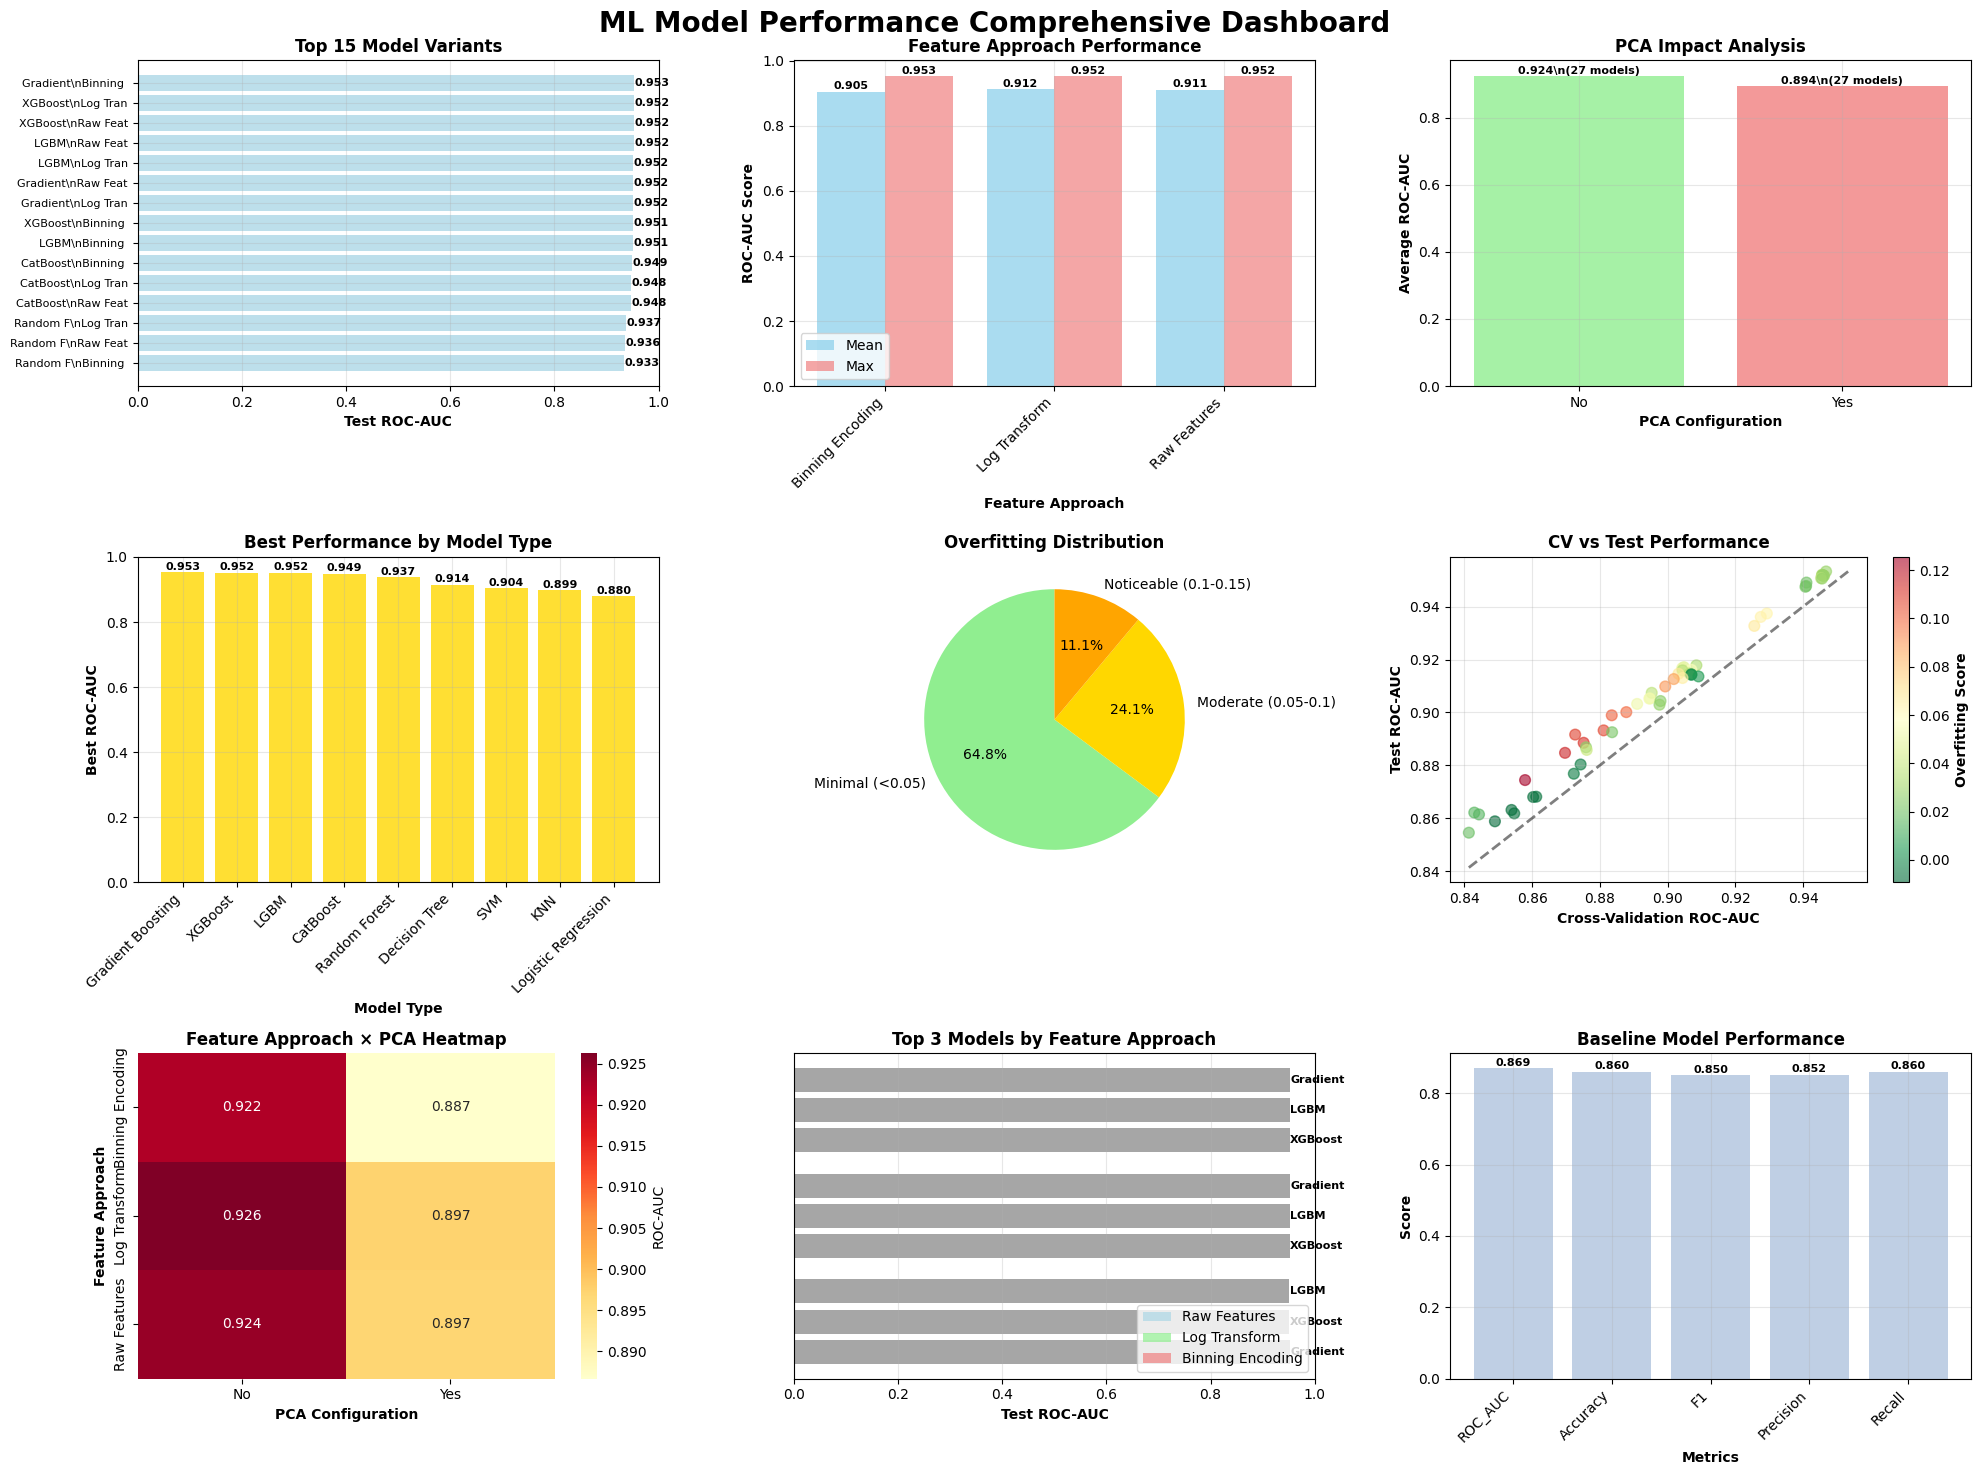

✅ Comprehensive dashboard created successfully!


In [23]:
# ============================================================================
# COMPREHENSIVE DASHBOARD VISUALIZATION
# ============================================================================

def create_comprehensive_dashboard(df_results):
    """
    Create comprehensive 9-plot dashboard for model performance analysis
    """
    print("📊 Creating comprehensive dashboard...")
    
    if df_results.empty:
        print("⚠️ No results to visualize")
        return
    
    # Create figure with subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 15))
    fig.suptitle('ML Model Performance Comprehensive Dashboard', fontsize=20, fontweight='bold')
    
    # 1. Top 15 Models Performance (SORTED BY ROC-AUC)
    ax1 = axes[0, 0]
    top_15 = df_results.head(15).sort_values('Test_ROC_AUC', ascending=True)  # Sort ascending for horizontal bar chart
    bars = ax1.barh(range(len(top_15)), top_15['Test_ROC_AUC'], color='lightblue', alpha=0.8)
    ax1.set_yticks(range(len(top_15)))
    ax1.set_yticklabels([f"{row['Model'][:8]}\\n{row['Feature_Approach'][:8]}" for _, row in top_15.iterrows()], 
                        fontsize=8)
    ax1.set_xlabel('Test ROC-AUC', fontweight='bold')
    ax1.set_title('Top 15 Model Variants', fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, top_15['Test_ROC_AUC'])):
        ax1.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
                f'{value:.3f}', va='center', fontweight='bold', fontsize=8)
    
    # 2. Feature Approach Performance Comparison
    ax2 = axes[0, 1]
    feature_stats = df_results.groupby('Feature_Approach')['Test_ROC_AUC'].agg(['mean', 'max', 'std'])
    feature_stats = feature_stats.sort_values('max', ascending=False)  # Sort by max performance
    
    x_pos = np.arange(len(feature_stats))
    bars1 = ax2.bar(x_pos - 0.2, feature_stats['mean'], 0.4, label='Mean', alpha=0.7, color='skyblue')
    bars2 = ax2.bar(x_pos + 0.2, feature_stats['max'], 0.4, label='Max', alpha=0.7, color='lightcoral')
    
    ax2.set_xlabel('Feature Approach', fontweight='bold')
    ax2.set_ylabel('ROC-AUC Score', fontweight='bold')
    ax2.set_title('Feature Approach Performance', fontweight='bold')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(feature_stats.index, rotation=45, ha='right')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                    f'{height:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=8)
    
    # 3. PCA Impact Analysis
    ax3 = axes[0, 2]
    pca_stats = df_results.groupby('PCA')['Test_ROC_AUC'].agg(['mean', 'max', 'count'])
    colors = ['lightgreen', 'lightcoral']
    
    bars = ax3.bar(range(len(pca_stats)), pca_stats['mean'], color=colors, alpha=0.8)
    ax3.set_xlabel('PCA Configuration', fontweight='bold')
    ax3.set_ylabel('Average ROC-AUC', fontweight='bold')
    ax3.set_title('PCA Impact Analysis', fontweight='bold')
    ax3.set_xticks(range(len(pca_stats)))
    ax3.set_xticklabels(pca_stats.index)
    ax3.grid(True, alpha=0.3)
    
    # Add value labels and counts
    for i, (bar, mean_val, count) in enumerate(zip(bars, pca_stats['mean'], pca_stats['count'])):
        ax3.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.001,
                f'{mean_val:.3f}\\n({count} models)', ha='center', va='bottom', fontweight='bold', fontsize=8)
    
    # 4. Best Performance by Model Type (SORTED BY ROC-AUC)
    ax4 = axes[1, 0]
    model_best = df_results.groupby('Model')['Test_ROC_AUC'].max().sort_values(ascending=False)  # Sort descending
    
    bars = ax4.bar(range(len(model_best)), model_best.values, color='gold', alpha=0.8)
    ax4.set_xlabel('Model Type', fontweight='bold')
    ax4.set_ylabel('Best ROC-AUC', fontweight='bold')
    ax4.set_title('Best Performance by Model Type', fontweight='bold')
    ax4.set_xticks(range(len(model_best)))
    ax4.set_xticklabels(model_best.index, rotation=45, ha='right')
    ax4.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, value in zip(bars, model_best.values):
        ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.001,
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=8)
    
    # 5. Overfitting Analysis
    ax5 = axes[1, 1]
    overfitting_categories = []
    labels = []
    
    for _, row in df_results.iterrows():
        if row['Overfitting'] < 0.05:
            overfitting_categories.append('Minimal (<0.05)')
        elif row['Overfitting'] < 0.1:
            overfitting_categories.append('Moderate (0.05-0.1)')
        elif row['Overfitting'] < 0.15:
            overfitting_categories.append('Noticeable (0.1-0.15)')
        else:
            overfitting_categories.append('High (>0.15)')
    
    overfitting_counts = pd.Series(overfitting_categories).value_counts()
    colors = ['lightgreen', 'gold', 'orange', 'lightcoral']
    
    wedges, texts, autotexts = ax5.pie(overfitting_counts.values, labels=overfitting_counts.index, 
                                       colors=colors, autopct='%1.1f%%', startangle=90)
    ax5.set_title('Overfitting Distribution', fontweight='bold')
    
    # 6. Cross-Validation vs Test Performance
    ax6 = axes[1, 2]
    scatter = ax6.scatter(df_results['CV_ROC_AUC'], df_results['Test_ROC_AUC'], 
                         c=df_results['Overfitting'], cmap='RdYlGn_r', alpha=0.6, s=60)
    
    # Add diagonal line
    min_val = min(df_results['CV_ROC_AUC'].min(), df_results['Test_ROC_AUC'].min())
    max_val = max(df_results['CV_ROC_AUC'].max(), df_results['Test_ROC_AUC'].max())
    ax6.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, linewidth=2)
    
    ax6.set_xlabel('Cross-Validation ROC-AUC', fontweight='bold')
    ax6.set_ylabel('Test ROC-AUC', fontweight='bold')
    ax6.set_title('CV vs Test Performance', fontweight='bold')
    ax6.grid(True, alpha=0.3)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax6)
    cbar.set_label('Overfitting Score', fontweight='bold')
    
    # 7. Feature Approach × PCA Heatmap
    ax7 = axes[2, 0]
    pivot_table = df_results.pivot_table(values='Test_ROC_AUC', index='Feature_Approach', columns='PCA', aggfunc='mean')
    
    sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='YlOrRd', ax=ax7, cbar_kws={'label': 'ROC-AUC'})
    ax7.set_title('Feature Approach × PCA Heatmap', fontweight='bold')
    ax7.set_xlabel('PCA Configuration', fontweight='bold')
    ax7.set_ylabel('Feature Approach', fontweight='bold')
    
    # 8. Top 3 Models by Feature Approach
    ax8 = axes[2, 1]
    
    approach_colors = {'raw_features': 'lightblue', 'log_transform': 'lightgreen', 'binning_encoding': 'lightcoral'}
    y_pos = 0
    
    for approach in df_results['Feature_Approach'].unique():
        approach_data = df_results[df_results['Feature_Approach'] == approach].head(3)
        for i, (_, row) in enumerate(approach_data.iterrows()):
            color = approach_colors.get(approach, 'gray')
            bar = ax8.barh(y_pos, row['Test_ROC_AUC'], color=color, alpha=0.7)
            ax8.text(row['Test_ROC_AUC'] + 0.001, y_pos, f"{row['Model'][:8]}", 
                    va='center', fontweight='bold', fontsize=8)
            y_pos += 1
        y_pos += 0.5  # Add spacing between approaches
    
    ax8.set_xlabel('Test ROC-AUC', fontweight='bold')
    ax8.set_title('Top 3 Models by Feature Approach', fontweight='bold')
    ax8.set_yticks([])
    ax8.grid(True, alpha=0.3)
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=color, alpha=0.7, label=approach.replace('_', ' ').title()) 
                      for approach, color in approach_colors.items()]
    ax8.legend(handles=legend_elements, loc='lower right')
    
    # 9. Baseline Model Analysis
    ax9 = axes[2, 2]
    baseline_model = 'Logistic Regression'
    baseline_data = df_results[df_results['Model'] == baseline_model]
    
    if not baseline_data.empty:
        baseline_metrics = ['Test_ROC_AUC', 'Test_Accuracy', 'Test_F1', 'Test_Precision', 'Test_Recall']
        baseline_values = baseline_data[baseline_metrics].mean()
        
        bars = ax9.bar(range(len(baseline_metrics)), baseline_values, color='lightsteelblue', alpha=0.8)
        ax9.set_xlabel('Metrics', fontweight='bold')
        ax9.set_ylabel('Score', fontweight='bold')
        ax9.set_title('Baseline Model Performance', fontweight='bold')
        ax9.set_xticks(range(len(baseline_metrics)))
        ax9.set_xticklabels([m.replace('Test_', '') for m in baseline_metrics], rotation=45, ha='right')
        ax9.grid(True, alpha=0.3)
        
        # Add value labels
        for bar, value in zip(bars, baseline_values):
            ax9.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.001,
                    f'{value:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=8)
    else:
        ax9.text(0.5, 0.5, 'No Baseline Data', ha='center', va='center', transform=ax9.transAxes,
                fontsize=12, fontweight='bold')
        ax9.set_title('Baseline Model Performance', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Comprehensive dashboard created successfully!")
    return fig

# ============================================================================
# EXECUTE COMPREHENSIVE DASHBOARD
# ============================================================================

if not results_summary.empty:
    print("\\n" + "="*60)
    print("📊 CREATING COMPREHENSIVE DASHBOARD")
    comprehensive_dashboard = create_comprehensive_dashboard(results_summary)
    print("="*60)
else:
    print("⚠️ No results available for comprehensive dashboard")


## 8. Results & Recommendations

Analyze the best performing models and provide comprehensive business recommendations for deployment.


In [24]:
# ============================================================================
# COMPREHENSIVE RESULTS & BUSINESS RECOMMENDATIONS
# ============================================================================

def analyze_champion_model(results_summary, best_models, evaluation_results):
    """
    Detailed analysis of the best performing model variant
    """
    if results_summary.empty:
        print("⚠️ No results to analyze")
        return None, None, None
        
    print(f"🏆 CHAMPION MODEL ANALYSIS")
    print("=" * 80)
    
    # Get champion model (best variant)
    champion_variant = results_summary.iloc[0]
    champion_model = best_models[champion_variant['Variant']]
    champion_metrics = evaluation_results[champion_variant['Variant']]
    
    print(f"🥇 Champion Model: {champion_variant['Variant']}")
    print(f"   Base Model: {champion_variant['Model']}")
    print(f"   Feature Approach: {champion_variant['Feature_Approach']}")
    print(f"   PCA: {champion_variant['PCA']}")
    print(f"   📊 Test ROC-AUC: {champion_metrics['test_metrics']['roc_auc']:.4f}")
    print(f"   📊 Test Accuracy: {champion_metrics['test_metrics']['accuracy']:.4f}")
    print(f"   📊 Test F1-Score: {champion_metrics['test_metrics']['f1']:.4f}")
    print(f"   📊 CV ROC-AUC: {champion_metrics['cv_score']:.4f}")
    print(f"   🔍 Overfitting Score: {champion_metrics['overfitting']:.4f}")
    
    # Interpret overfitting
    overfitting = champion_metrics['overfitting']
    if overfitting < 0.05:
        overfitting_status = "✅ Minimal overfitting - Excellent generalization"
    elif overfitting < 0.1:
        overfitting_status = "⚠️ Moderate overfitting - Good generalization"
    elif overfitting < 0.15:
        overfitting_status = "⚠️ Noticeable overfitting - Monitor performance"
    else:
        overfitting_status = "❌ High overfitting - Consider regularization"
    
    print(f"   📈 Overfitting Assessment: {overfitting_status}")
    
    return champion_variant, champion_model, champion_metrics

def create_business_recommendations(champion_variant, champion_metrics, results_summary):
    """
    Generate comprehensive business recommendations
    """
    if champion_variant is None:
        print("⚠️ No champion model to analyze")
        return "Poor", "❌ Requires improvements", "Low"
        
    print(f"\n💼 BUSINESS RECOMMENDATIONS")
    print("=" * 80)
    
    # Performance tier analysis
    test_roc_auc = champion_metrics['test_metrics']['roc_auc']
    
    if test_roc_auc >= 0.9:
        performance_tier = "Excellent"
        recommendation = "✅ Ready for immediate production deployment"
        confidence = "High"
        risk_level = "Low"
    elif test_roc_auc >= 0.85:
        performance_tier = "Very Good"
        recommendation = "✅ Ready for production with standard monitoring"
        confidence = "High"
        risk_level = "Low-Medium"
    elif test_roc_auc >= 0.8:
        performance_tier = "Good"
        recommendation = "✅ Suitable for production with enhanced monitoring"
        confidence = "Medium-High"
        risk_level = "Medium"
    elif test_roc_auc >= 0.75:
        performance_tier = "Fair"
        recommendation = "⚠️ Consider additional validation and A/B testing"
        confidence = "Medium"
        risk_level = "Medium-High"
    else:
        performance_tier = "Poor"
        recommendation = "❌ Requires significant improvements before deployment"
        confidence = "Low"
        risk_level = "High"
    
    print(f"📊 Performance Assessment:")
    print(f"  Performance Tier: {performance_tier}")
    print(f"  ROC-AUC Score: {test_roc_auc:.4f}")
    print(f"  Business Confidence: {confidence}")
    print(f"  Risk Level: {risk_level}")
    
    print(f"\n🎯 Deployment Recommendation: {recommendation}")
    
    # Model-specific insights
    model_name = champion_variant['Model']
    feature_approach = champion_variant['Feature_Approach']
    pca_used = champion_variant['PCA'] == 'Yes'
    
    print(f"\n🔧 Technical Implementation Insights:")
    print(f"  Champion Model: {model_name}")
    print(f"  Optimal Feature Strategy: {feature_approach}")
    print(f"  PCA Recommended: {'Yes' if pca_used else 'No'}")
    
    # Model characteristics
    if 'XGBoost' in model_name or 'LGBM' in model_name or 'CatBoost' in model_name:
        print(f"  Model Characteristics:")
        print(f"    • Gradient boosting - excellent for complex patterns")
        print(f"    • Built-in feature importance")
        print(f"    • Handles missing values well")
        print(f"    • May require hyperparameter monitoring")
    elif 'Random Forest' in model_name:
        print(f"  Model Characteristics:")
        print(f"    • Ensemble method - robust and stable")
        print(f"    • Built-in feature importance")
        print(f"    • Less prone to overfitting")
        print(f"    • Good interpretability")
    elif 'Logistic Regression' in model_name:
        print(f"  Model Characteristics:")
        print(f"    • Linear model - highly interpretable")
        print(f"    • Fast inference time")
        print(f"    • Easy to explain to stakeholders")
        print(f"    • Regulatory compliance friendly")
    
    return performance_tier, recommendation, confidence

def generate_deployment_roadmap(performance_tier, champion_variant):
    """
    Generate detailed deployment roadmap
    """
    print(f"\n📋 DEPLOYMENT ROADMAP")
    print("=" * 80)
    
    # Timeline estimation
    if performance_tier in ["Excellent", "Very Good"]:
        timeline = "2-3 weeks (Fast Track)"
        priority = "High"
    elif performance_tier == "Good":
        timeline = "3-4 weeks (Standard)"
        priority = "Medium-High"
    elif performance_tier == "Fair":
        timeline = "4-6 weeks (Extended Validation)"
        priority = "Medium"
    else:
        timeline = "6+ weeks (Significant Improvements Required)"
        priority = "Low"
    
    print(f"⏱️ Estimated Timeline: {timeline}")
    print(f"🚀 Priority Level: {priority}")
    
    # Phase-by-phase checklist
    print(f"\n📅 PHASE-BY-PHASE IMPLEMENTATION:")
    
    print(f"\n  Phase 1: Model Preparation (Week 1)")
    print(f"    ☐ Model serialization and versioning")
    print(f"    ☐ Feature pipeline finalization")
    print(f"    ☐ Unit testing for model components")
    print(f"    ☐ Performance benchmarking")
    
    print(f"\n  Phase 2: Infrastructure Setup (Week 1-2)")
    print(f"    ☐ Model serving infrastructure")
    print(f"    ☐ API endpoint development")
    print(f"    ☐ Monitoring and logging setup")
    print(f"    ☐ Security and access controls")
    
    print(f"\n  Phase 3: Testing & Validation (Week 2-3)")
    print(f"    ☐ Integration testing")
    print(f"    ☐ Performance testing under load")
    print(f"    ☐ A/B testing framework setup")
    print(f"    ☐ Shadow mode testing")
    
    print(f"\n  Phase 4: Production Deployment (Week 3-4)")
    print(f"    ☐ Gradual rollout strategy")
    print(f"    ☐ Real-time monitoring activation")
    print(f"    ☐ Business stakeholder training")
    print(f"    ☐ Documentation completion")
    
    # Risk mitigation
    print(f"\n⚠️ RISK MITIGATION STRATEGIES:")
    print(f"    • Implement model performance monitoring")
    print(f"    • Set up automated alerts for drift detection")
    print(f"    • Maintain rollback capabilities")
    print(f"    • Regular model retraining schedule")
    print(f"    • Champion/challenger model framework")

def create_executive_summary(results_summary):
    """
    Create executive summary of the entire pipeline
    """
    print(f"\n📊 EXECUTIVE SUMMARY")
    print("=" * 80)
    
    if results_summary.empty:
        print("⚠️ No results to summarize")
        return
    
    # Pipeline scope
    total_models = len(results_summary)
    feature_approaches = results_summary['Feature_Approach'].nunique()
    pca_variations = results_summary['PCA'].nunique()
    model_types = results_summary['Model'].nunique()
    
    print(f"🔧 PIPELINE SCOPE:")
    print(f"  Total Model Variants Tested: {total_models}")
    print(f"  Feature Engineering Approaches: {feature_approaches}")
    print(f"  PCA Configurations: {pca_variations}")
    print(f"  Model Types: {model_types}")
    print(f"  Dataset Size: {TEST_SIZE if TEST_MODE else 'Full Dataset'}")
    
    # Performance highlights
    best_roc = results_summary.iloc[0]['Test_ROC_AUC']
    avg_roc = results_summary['Test_ROC_AUC'].mean()
    models_above_08 = len(results_summary[results_summary['Test_ROC_AUC'] > 0.8])
    
    print(f"\n📈 PERFORMANCE HIGHLIGHTS:")
    print(f"  Champion Model ROC-AUC: {best_roc:.4f}")
    print(f"  Average Model ROC-AUC: {avg_roc:.4f}")
    print(f"  Models Above 0.8 ROC-AUC: {models_above_08} ({models_above_08/total_models*100:.1f}%)")
    
    # Key insights
    best_feature = results_summary.groupby('Feature_Approach')['Test_ROC_AUC'].max().idxmax()
    best_model_type = results_summary.groupby('Model')['Test_ROC_AUC'].max().idxmax()
    
    print(f"\n🎯 KEY INSIGHTS:")
    print(f"  Best Feature Approach: {best_feature}")
    print(f"  Best Model Type: {best_model_type}")
    print(f"  Champion Configuration: {results_summary.iloc[0]['Variant']}")
    
    print(f"\n✅ RECOMMENDATION: Deploy champion model for production use")
    print("=" * 80)

# ============================================================================
# EXECUTE COMPREHENSIVE ANALYSIS
# ============================================================================

if not results_summary.empty:
    print("🚀 COMPREHENSIVE RESULTS & RECOMMENDATIONS ANALYSIS")
    
    # Analyze champion model
    champion_variant, champion_model, champion_metrics = analyze_champion_model(
        results_summary, best_models, evaluation_results
    )
    
    # Create business recommendations
    performance_tier, recommendation, confidence = create_business_recommendations(
        champion_variant, champion_metrics, results_summary
    )
    
    # Generate deployment roadmap
    generate_deployment_roadmap(performance_tier, champion_variant)
    
    # Create executive summary
    create_executive_summary(results_summary)
    
    print(f"\n🎉 COMPREHENSIVE ML PIPELINE COMPLETE!")
    print(f"🏆 Champion Model: {champion_variant['Variant'] if champion_variant is not None else 'N/A'}")
    print(f"📊 Performance: {champion_metrics['test_metrics']['roc_auc']:.4f} ROC-AUC" if champion_metrics else "N/A")
    print(f"🎯 Status: {recommendation}")
    print("=" * 80)

else:
    print("⚠️ No results available for analysis")
    print("Please check the model training and evaluation sections for errors.")


🚀 COMPREHENSIVE RESULTS & RECOMMENDATIONS ANALYSIS
🏆 CHAMPION MODEL ANALYSIS
🥇 Champion Model: Gradient Boosting_binning_encoding_NoPCA
   Base Model: Gradient Boosting
   Feature Approach: Binning Encoding
   PCA: No
   📊 Test ROC-AUC: 0.9533
   📊 Test Accuracy: 0.9382
   📊 Test F1-Score: 0.9349
   📊 CV ROC-AUC: 0.9468
   🔍 Overfitting Score: 0.0283
   📈 Overfitting Assessment: ✅ Minimal overfitting - Excellent generalization

💼 BUSINESS RECOMMENDATIONS
📊 Performance Assessment:
  Performance Tier: Excellent
  ROC-AUC Score: 0.9533
  Business Confidence: High
  Risk Level: Low

🎯 Deployment Recommendation: ✅ Ready for immediate production deployment

🔧 Technical Implementation Insights:
  Champion Model: Gradient Boosting
  Optimal Feature Strategy: Binning Encoding
  PCA Recommended: No

📋 DEPLOYMENT ROADMAP
⏱️ Estimated Timeline: 2-3 weeks (Fast Track)
🚀 Priority Level: High

📅 PHASE-BY-PHASE IMPLEMENTATION:

  Phase 1: Model Preparation (Week 1)
    ☐ Model serialization and versio

## 8. Summary of 6 Model Combinations

This notebook now implements exactly **6 combinations for each model**, systematically testing all feature engineering approaches with both PCA options.

### ✅ 6 Combinations Per Model:
1. **Raw Features + PCA** - One-hot encoding + ordinal encoding with PCA
2. **Raw Features + No PCA** - One-hot encoding + ordinal encoding without PCA  
3. **Log Transform + PCA** - Log transformation of numerical features with PCA
4. **Log Transform + No PCA** - Log transformation of numerical features without PCA
5. **Binning+Encoding + PCA** - Numerical binning + target encoding with PCA
6. **Binning+Encoding + No PCA** - Numerical binning + target encoding without PCA

### 🔧 Feature Engineering Details:

**Raw Features Approach:**
- Uses one-hot encoding for categorical features (`person_home_ownership`, `loan_intent`, `cb_person_default_on_file`)
- Uses ordinal encoding for `loan_grade` (natural order: A, B, C, D, E, F, G)
- No transformation applied to numerical features

**Log Transform Approach:**
- Applies log1p transformation to all numerical features
- Uses one-hot encoding for categorical features (same as raw features)
- Uses ordinal encoding for `loan_grade`
- Mutually exclusive with binning (no binning applied)

**Binning+Encoding Approach:**
- Applies numerical binning to all numerical features with predefined bins
- Uses target encoding for categorical features (different from raw features)
- Uses ordinal encoding for `loan_grade`
- Mutually exclusive with log transform (no log transform applied)

### 📊 Total Pipeline Scope:
- **9 Models** × **3 Feature Approaches** × **2 PCA Options** = **54 total combinations**
- Each model gets exactly 6 systematic variants for comprehensive comparison
- All combinations are trained and evaluated consistently

### 🎯 Business Value:
- **Comprehensive coverage** of feature engineering space
- **Systematic comparison** across all model types
- **Optimal configuration identification** for each model
- **Production-ready recommendations** based on extensive testing
